In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('Historical Product Demand.csv')
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


## Data understanding

In [5]:
df.shape

(1048575, 5)

In [6]:
df['Product_Code'].unique()

array(['Product_0993', 'Product_0979', 'Product_1159', ...,
       'Product_0237', 'Product_0644', 'Product_0853'], dtype=object)

In [7]:
df['Warehouse'].unique()

array(['Whse_J', 'Whse_S', 'Whse_C', 'Whse_A'], dtype=object)

In [8]:
df['Product_Category'].nunique()

33

In [9]:
df.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
dtype: object

In [10]:
df['Order_Demand'].unique()

array(['100 ', '500 ', '50000 ', ..., '(3750)', '(191)', '28250 '],
      dtype=object)

In [11]:
def change_to_int(x):
    try:
        return int(x)
    except:
        return int(x[1:-1])
check = '(19)'
change_to_int(check)

19

In [12]:
df['Order_Demand'] = df['Order_Demand'].apply(lambda x:change_to_int(x))

## Data Cleaning

In [13]:
df.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand         int64
dtype: object

In [14]:
df.describe()

,Order_Demand
count,1.048575e+06
mean,4.906977e+03
std,2.892678e+04
min,0.000000e+00
25%,2.000000e+01
50%,3.000000e+02
75%,2.000000e+03
max,4.000000e+06


In [15]:
df.isna().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

In [16]:
null = df.isna().sum()[3]
(100* null)/df.shape[0]

1.0718355863910545

In [17]:
df1 = df.dropna()

In [18]:
df1.isna().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

In [19]:
df1 = df = df.rename(columns = {'Product_Code': 'Code',
                    'Product_Category':'Category',
                    'Order_Demand':'Demand'})
df1.head()

,Code,Warehouse,Category,Date,Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [20]:
df1.Date.sort_values()[:20]

44799       2011/1/8
131429    2011/10/20
131426    2011/10/20
75193     2011/10/31
131026    2011/11/18
131032    2011/11/18
131031    2011/11/18
131027    2011/11/18
131028    2011/11/18
44450     2011/11/18
44795     2011/11/18
44796     2011/11/21
44797     2011/11/21
44798     2011/11/21
119561    2011/11/21
107158    2011/11/22
107159    2011/11/22
111727    2011/11/22
44102     2011/11/23
71915     2011/11/23
Name: Date, dtype: object

In [21]:
df2 = df1.set_index('Date')
df2.index = pd.to_datetime(df2.index)
df2.head()

,Code,Warehouse,Category,Demand
Date,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100
2012-01-19,Product_0979,Whse_J,Category_028,500
2012-02-03,Product_0979,Whse_J,Category_028,500
2012-02-09,Product_0979,Whse_J,Category_028,500
2012-03-02,Product_0979,Whse_J,Category_028,500


In [22]:
df2.index.min(), df2.index.max()

(Timestamp('2011-01-08 00:00:00'), Timestamp('2017-01-09 00:00:00'))

## Univariate Analysis

<Axes: xlabel='Warehouse', ylabel='count'>

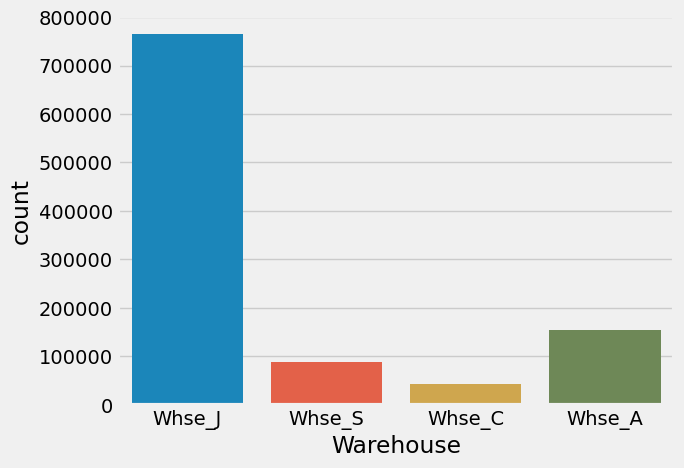

In [23]:
sns.countplot(x='Warehouse', data=df2)

<Axes: >

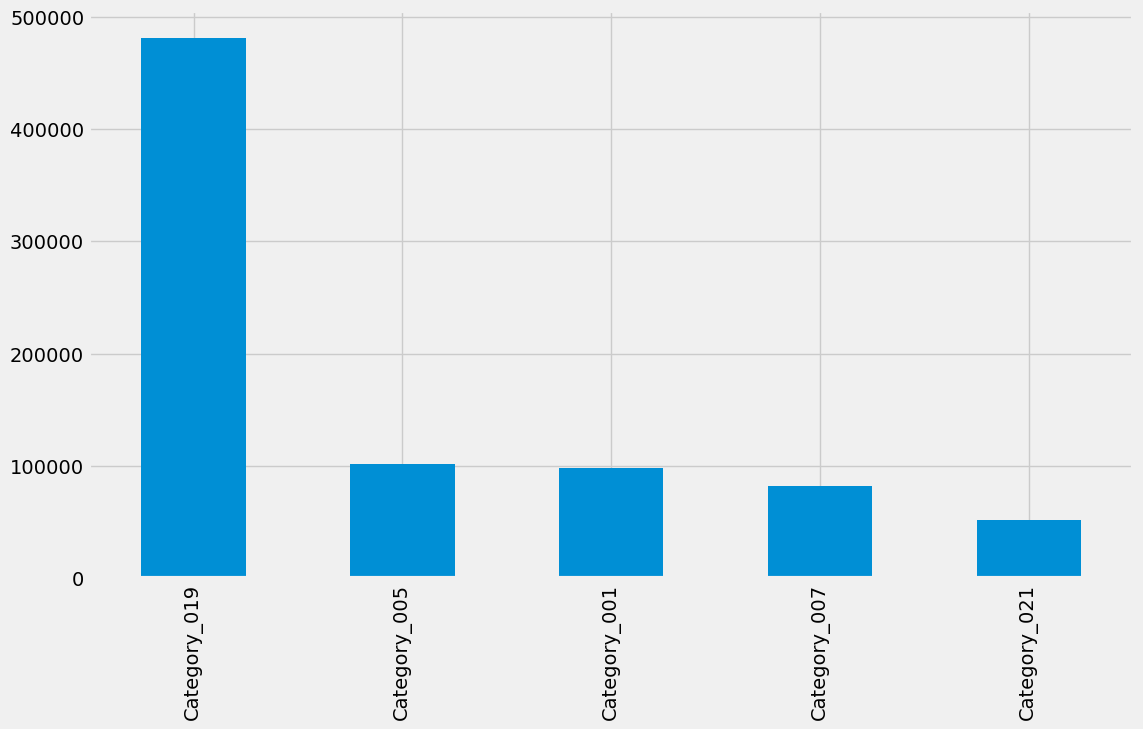

In [24]:
df2.Category.value_counts().nlargest(5).plot(kind='bar',figsize = (12,7))

<Axes: title={'center': 'Order Demand'}, xlabel='Date'>

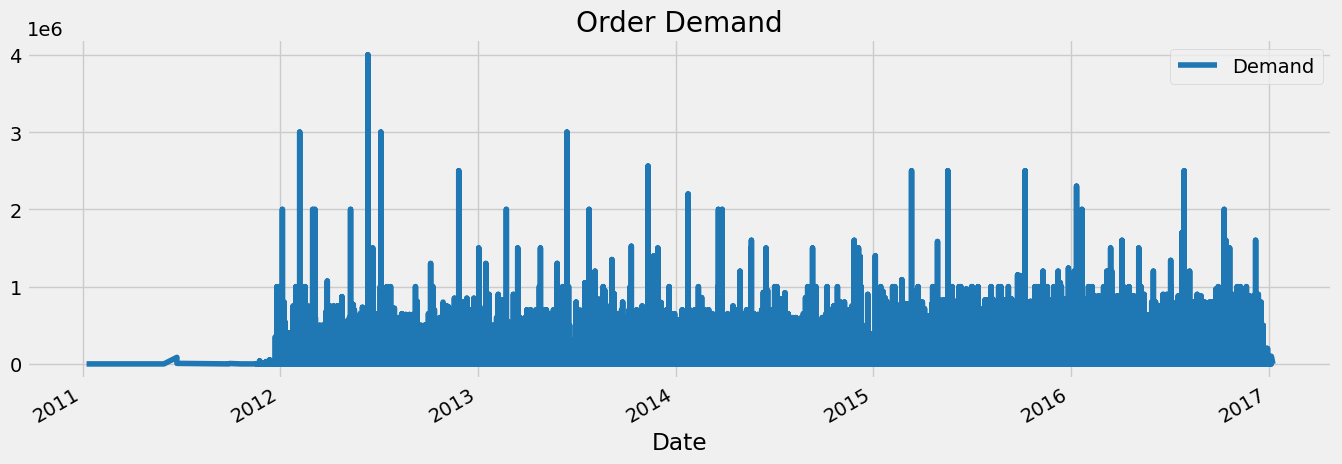

In [25]:
df2.plot(kind='line',figsize=(15,5),color = color_pal[0],title = 'Order Demand')

In [26]:
DF = pd.pivot_table(df2,index = ['Date'], values = ['Demand'], columns = ['Category'], aggfunc=np.sum)
y = DF.resample('M').sum()
y.index.freq = 'M'
y.tail(10)

Demand                                                      \
Category   Category_001 Category_002 Category_003 Category_004 Category_005   
Date                                                                          
2016-04-30      33286.0          0.0       2535.0          0.0    3291070.0   
2016-05-31      26582.0          0.0       4786.0          0.0    3467920.0   
2016-06-30      35882.0          0.0       3455.0          0.0    2735250.0   
2016-07-31      31435.0          0.0       4493.0          0.0    2533950.0   
2016-08-31      26760.0          0.0       4590.0          0.0    3125915.0   
2016-09-30      33424.0          0.0       3563.0          0.0    2945675.0   
2016-10-31      30977.0          0.0       5473.0          0.0    3069975.0   
2016-11-30      35017.0          0.0       6040.0          0.0    3705710.0   
2016-12-31      43254.0          0.0       2242.0          0.0    3428625.0   
2017-01-31         29.0          0.0          0.0          0.0      10600.0   

                                                                             \
Category   Category_006 Category_007 Category_008 Category_009 Category_010   
Date                                                                          
2016-04-30    6463651.0    2987228.0        187.0      46225.0        414.0   
2016-05-31    7363964.0     696509.0        110.0      35875.0        936.0   
2016-06-30    9154248.0    2484519.0        288.0      39661.0        619.0   
2016-07-31    6074390.0    1898360.0        488.0      38082.0        123.0   
2016-08-31    6250962.0    1722838.0        463.0      41643.0        316.0   
2016-09-30    6710359.0    2145667.0         60.0      33318.0        180.0   
2016-10-31    6213754.0    1753002.0        127.0      35252.0        257.0   
2016-11-30    8264513.0    1261750.0        294.0      52757.0       1082.0   
2016-12-31    6751807.0    1761707.0        254.0      27357.0        118.0   
2017-01-31      70000.0       2472.0          0.0          0.0          0.0   

            ...                                                      \
Category    ... Category_024 Category_025 Category_026 Category_027   
Date        ...                                                       
2016-04-30  ...      18033.0          0.0       4482.0          0.0   
2016-05-31  ...      11803.0          0.0       3211.0          0.0   
2016-06-30  ...      20042.0          0.0       3704.0          0.0   
2016-07-31  ...      13964.0          0.0       3790.0          1.0   
2016-08-31  ...      12863.0          0.0       3503.0         10.0   
2016-09-30  ...      10866.0          0.0       4037.0          0.0   
2016-10-31  ...      10465.0          0.0       4973.0          0.0   
2016-11-30  ...      20502.0          0.0       3487.0          2.0   
2016-12-31  ...      12991.0          0.0       3970.0          6.0   
2017-01-31  ...          0.0          0.0         15.0          0.0   

                                                                             \
Category   Category_028 Category_029 Category_030 Category_031 Category_032   
Date                                                                          
2016-04-30     832774.0        415.0     535827.0        291.0      32582.0   
2016-05-31    1071112.0        367.0     408555.0        215.0      55574.0   
2016-06-30     754085.0        565.0     518725.0        111.0      59232.0   
2016-07-31    1059580.0         63.0     597804.0        248.0      44342.0   
2016-08-31    1054377.0        201.0     775152.0        188.0     126272.0   
2016-09-30     980666.0        476.0     561306.0        211.0      29602.0   
2016-10-31     821291.0        518.0     659225.0        147.0      53300.0   
2016-11-30     471210.0        647.0     694702.0         91.0      38702.0   
2016-12-31     393459.0        104.0     690505.0         97.0      68814.0   
2017-01-31        250.0          0.0          0.0          0.0          0.0   

         

In [27]:
df2.head()

,Code,Warehouse,Category,Demand
Date,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100
2012-01-19,Product_0979,Whse_J,Category_028,500
2012-02-03,Product_0979,Whse_J,Category_028,500
2012-02-09,Product_0979,Whse_J,Category_028,500
2012-03-02,Product_0979,Whse_J,Category_028,500


<Axes: title={'center': 'Order Demand'}, xlabel='Date'>

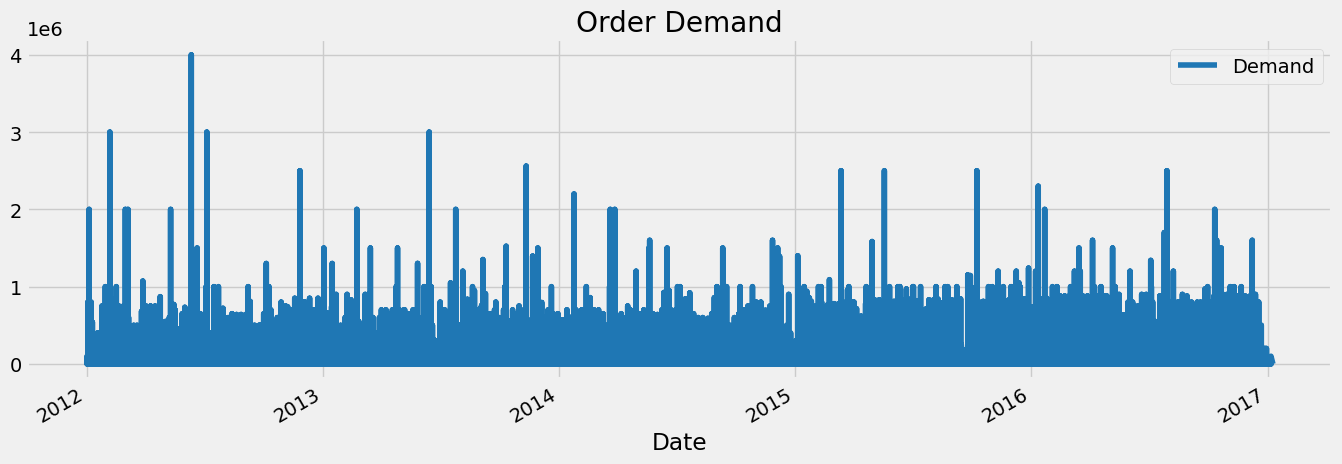

In [28]:
df3 = df2.loc[df2.index >= '2012-01-01']
df3.plot(kind='line',figsize=(15,5),color = color_pal[0],title = 'Order Demand')

In [29]:
df3.index.sort_values()[:10]

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-02', '2012-01-02',
               '2012-01-02', '2012-01-02', '2012-01-02', '2012-01-02',
               '2012-01-02', '2012-01-02'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [30]:
df3.Demand.skew()

31.50629353130924

## Bivariate Analysis/ Multivariate Analysis

In [31]:
warehouse_demand = df3.groupby('Warehouse')['Demand'].sum()
warehouse_demand

Warehouse
Whse_A     147646550
Whse_C     582039557
Whse_J    3363001849
Whse_S    1033122081
Name: Demand, dtype: int64

<Axes: ylabel='Sum of the demand'>

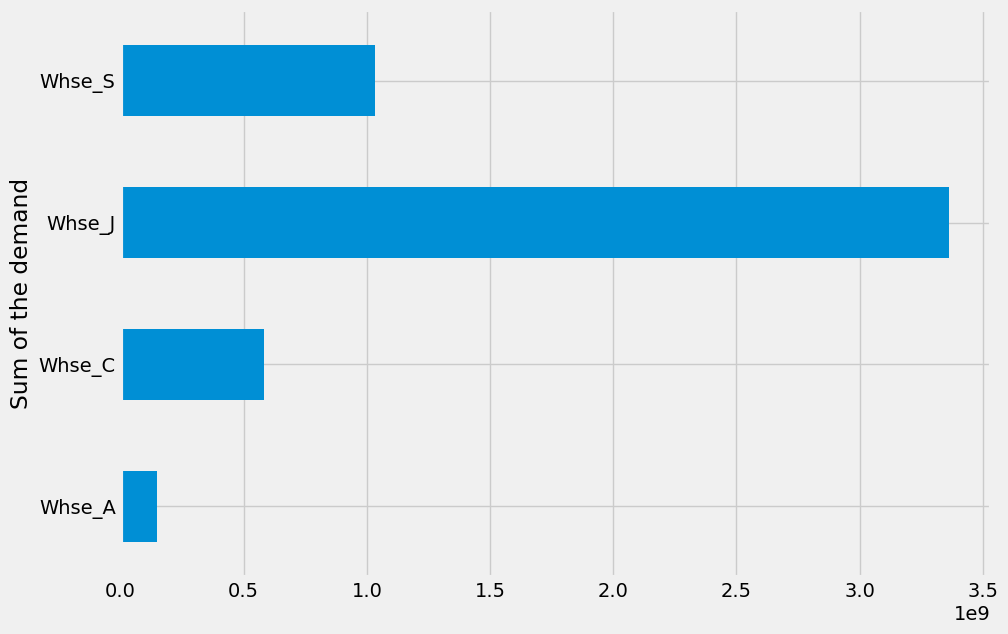

In [32]:
warehouse_demand.plot(kind='barh',ylabel = 'Sum of the demand', figsize=(10,7))

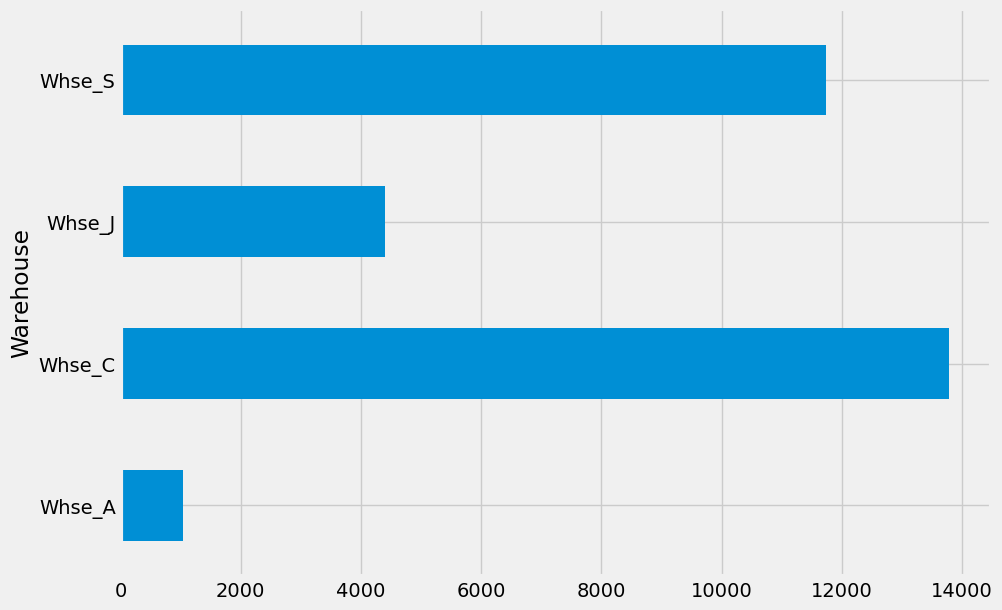

In [33]:
df3.groupby('Warehouse')['Demand'].mean().plot(kind='barh',figsize=(10,7))
plt.show()

## Feature Engineering

In [34]:
def create_features(dataframe):
    dataframe = dataframe.copy()
    dataframe['day_of_the_week'] = dataframe.index.dayofweek
    dataframe['Quarter'] = dataframe.index.quarter
    dataframe['Month'] = dataframe.index.month
    dataframe['Year'] = dataframe.index.year
    dataframe['week'] = dataframe.index.isocalendar().week.astype(int)
    return dataframe

df4 = create_features(df3)
df4.dtypes

Code               object
Warehouse          object
Category           object
Demand              int64
day_of_the_week     int64
Quarter             int64
Month               int64
Year                int64
week                int64
dtype: object

In [35]:
df4.head()

,Code,Warehouse,Category,Demand,day_of_the_week,Quarter,Month,Year,week
Date,,,,,,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100,4,3,7,2012,30
2012-01-19,Product_0979,Whse_J,Category_028,500,3,1,1,2012,3
2012-02-03,Product_0979,Whse_J,Category_028,500,4,1,2,2012,5
2012-02-09,Product_0979,Whse_J,Category_028,500,3,1,2,2012,6
2012-03-02,Product_0979,Whse_J,Category_028,500,4,1,3,2012,9


In [36]:
features = ['day_of_the_week','Quarter','Month','Year','week']
target = ['Demand']
features

['day_of_the_week', 'Quarter', 'Month', 'Year', 'week']

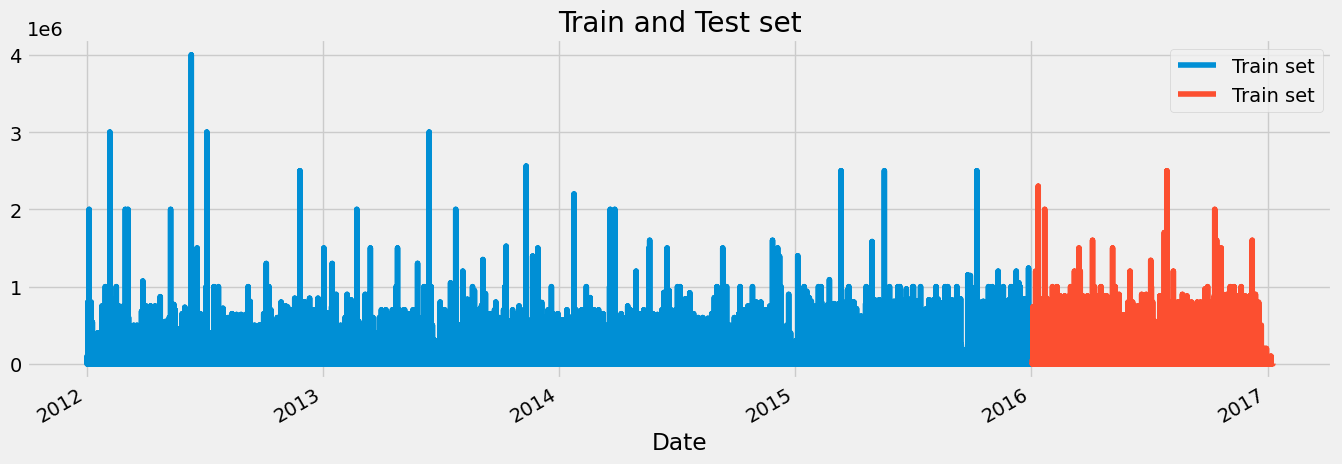

In [37]:
df_train = df4.loc[df3.index <= '2016-01-01'].copy()
df_test = df4.loc[df3.index > '2016-01-01'].copy()

fig, ax = plt.subplots(figsize=(15,5))
df_train['Demand'].plot(ax = ax, label = 'Train set', legend = 'Train set', title = 'Train and Test set')
df_test['Demand'].plot(ax = ax, label = 'Train set', legend = 'Train set')
plt.show()

In [38]:
x_train = df_train[features]
x_test = df_test[features]

y_train = df_train[target]
y_test = df_test[target]

## Time Series Analysis

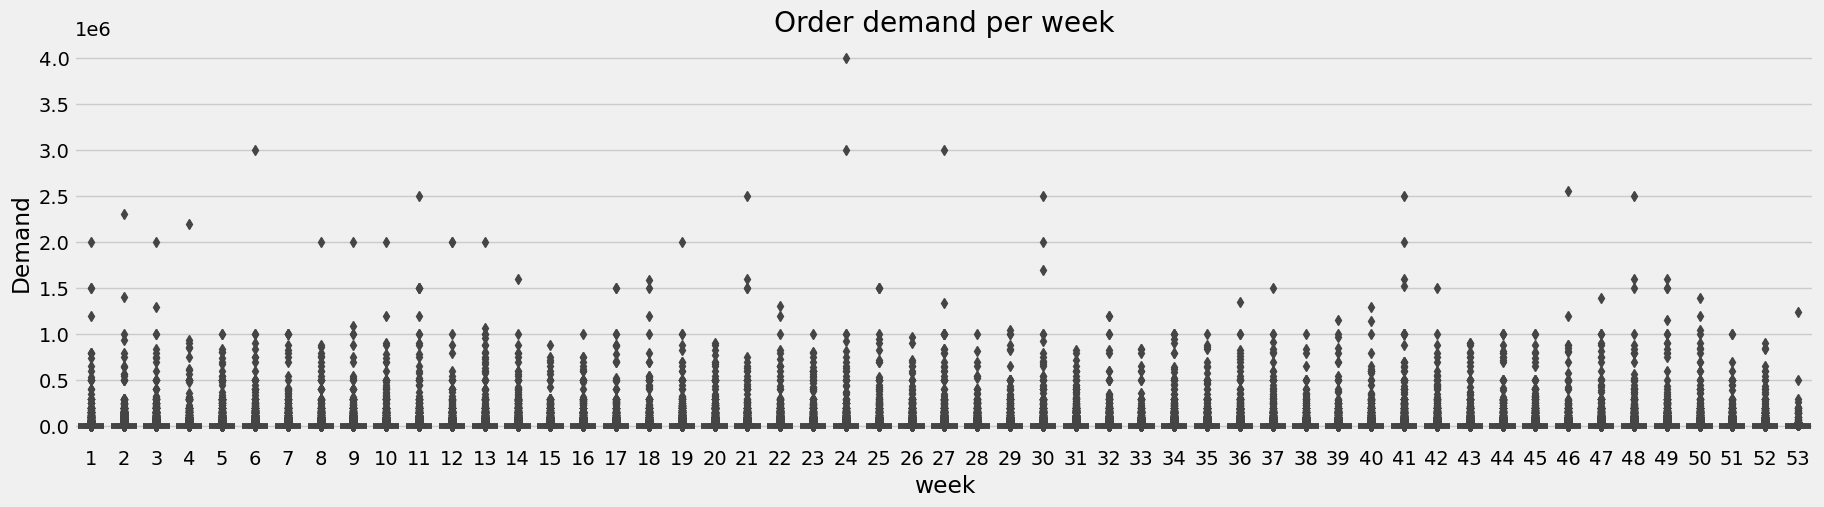

In [45]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(data=df4, x = 'week', y = 'Demand')
ax.set_title('Order demand per week')
plt.show()

In [46]:
df_week = df4.resample('W').mean()
df_week.head()

/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/451076301.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_week = df4.resample('W').mean()


,Demand,day_of_the_week,Quarter,Month,Year,week
Date,,,,,,
2012-01-01,2.000000,6.000000,1.0,1.0,2012.0,52.0
2012-01-08,7284.227771,3.186358,1.0,1.0,2012.0,1.0
2012-01-15,4444.277167,2.355514,1.0,1.0,2012.0,2.0
2012-01-22,4115.208970,1.966424,1.0,1.0,2012.0,3.0
2012-01-29,3597.824067,1.842063,1.0,1.0,2012.0,4.0


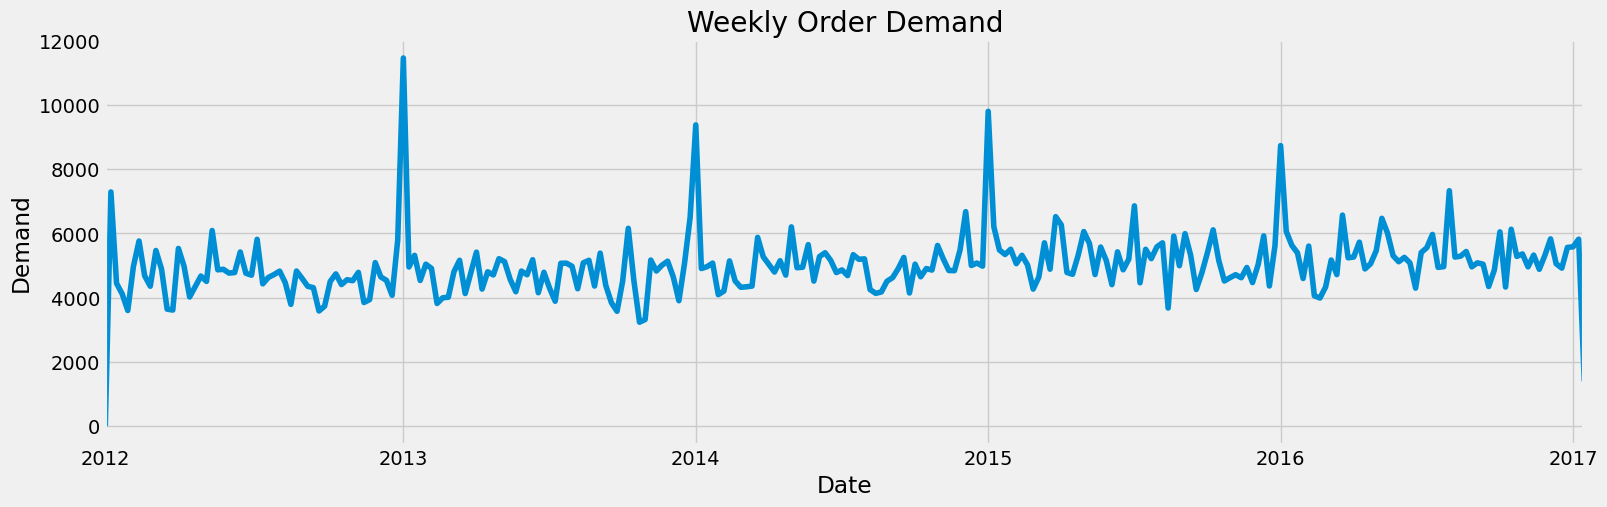

In [47]:
df_week['Demand'].plot(figsize=(17,5), title = 'Weekly Order Demand')
plt.ylabel('Demand')
plt.show()

In [48]:
df_month = df4.resample('MS').mean()
df_month.head()

/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/3002762898.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_month = df4.resample('MS').mean()


,Demand,day_of_the_week,Quarter,Month,Year,week
Date,,,,,,
2012-01-01,4760.537787,2.063597,1.0,1.0,2012.0,2.906302
2012-02-01,4797.869006,1.990785,1.0,2.0,2012.0,6.967279
2012-03-01,4647.560310,2.195657,1.0,3.0,2012.0,11.151742
2012-04-01,4503.559554,2.010428,2.0,4.0,2012.0,15.523689
2012-05-01,5069.122546,1.909604,2.0,5.0,2012.0,20.097214


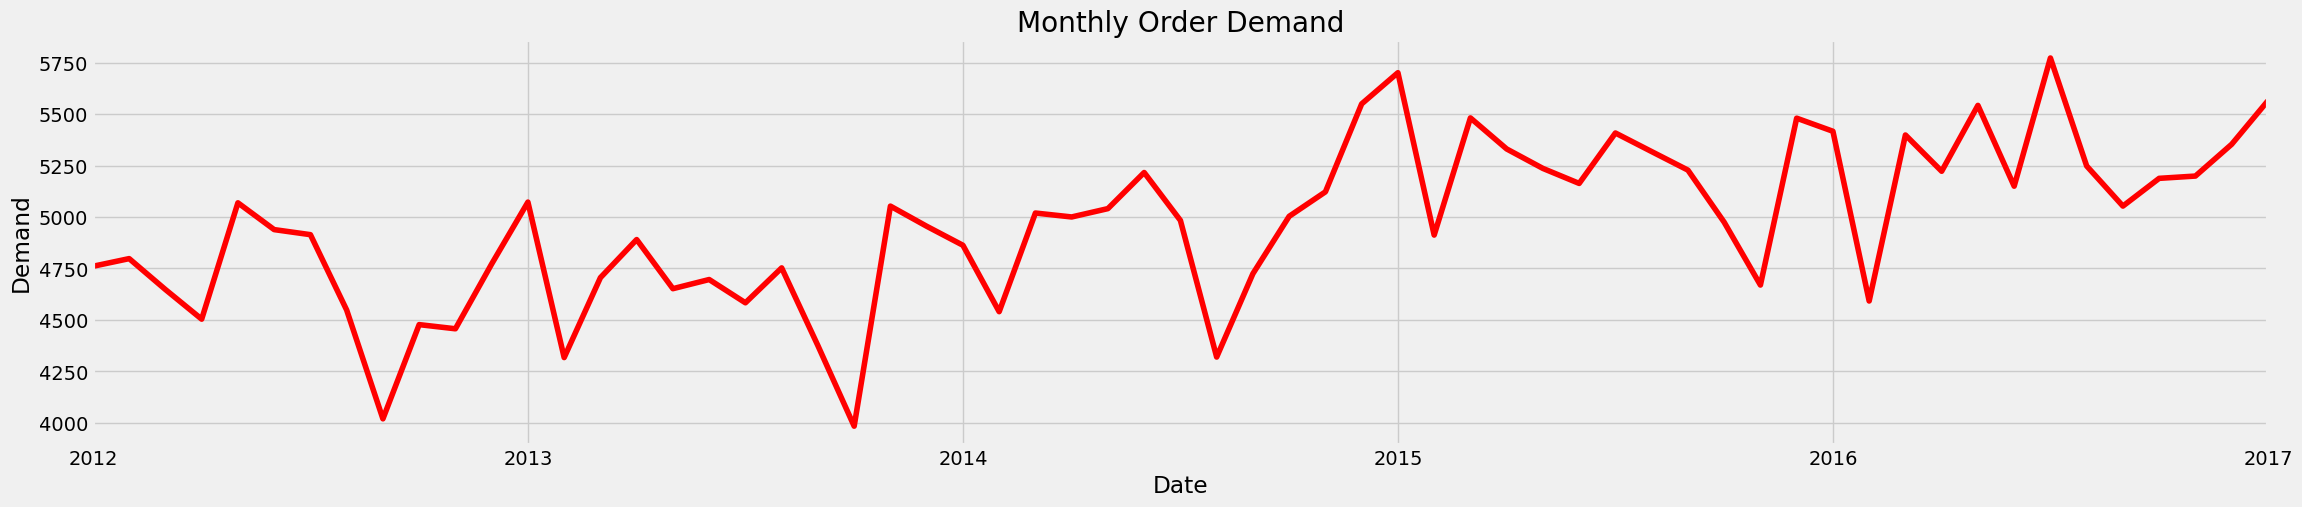

In [49]:
df_month['Demand'].plot(figsize=(25,5), title = 'Monthly Order Demand', color = 'red')
plt.ylabel('Demand')
plt.show()

### Decomposition to check the seasonality, trends and residuals.

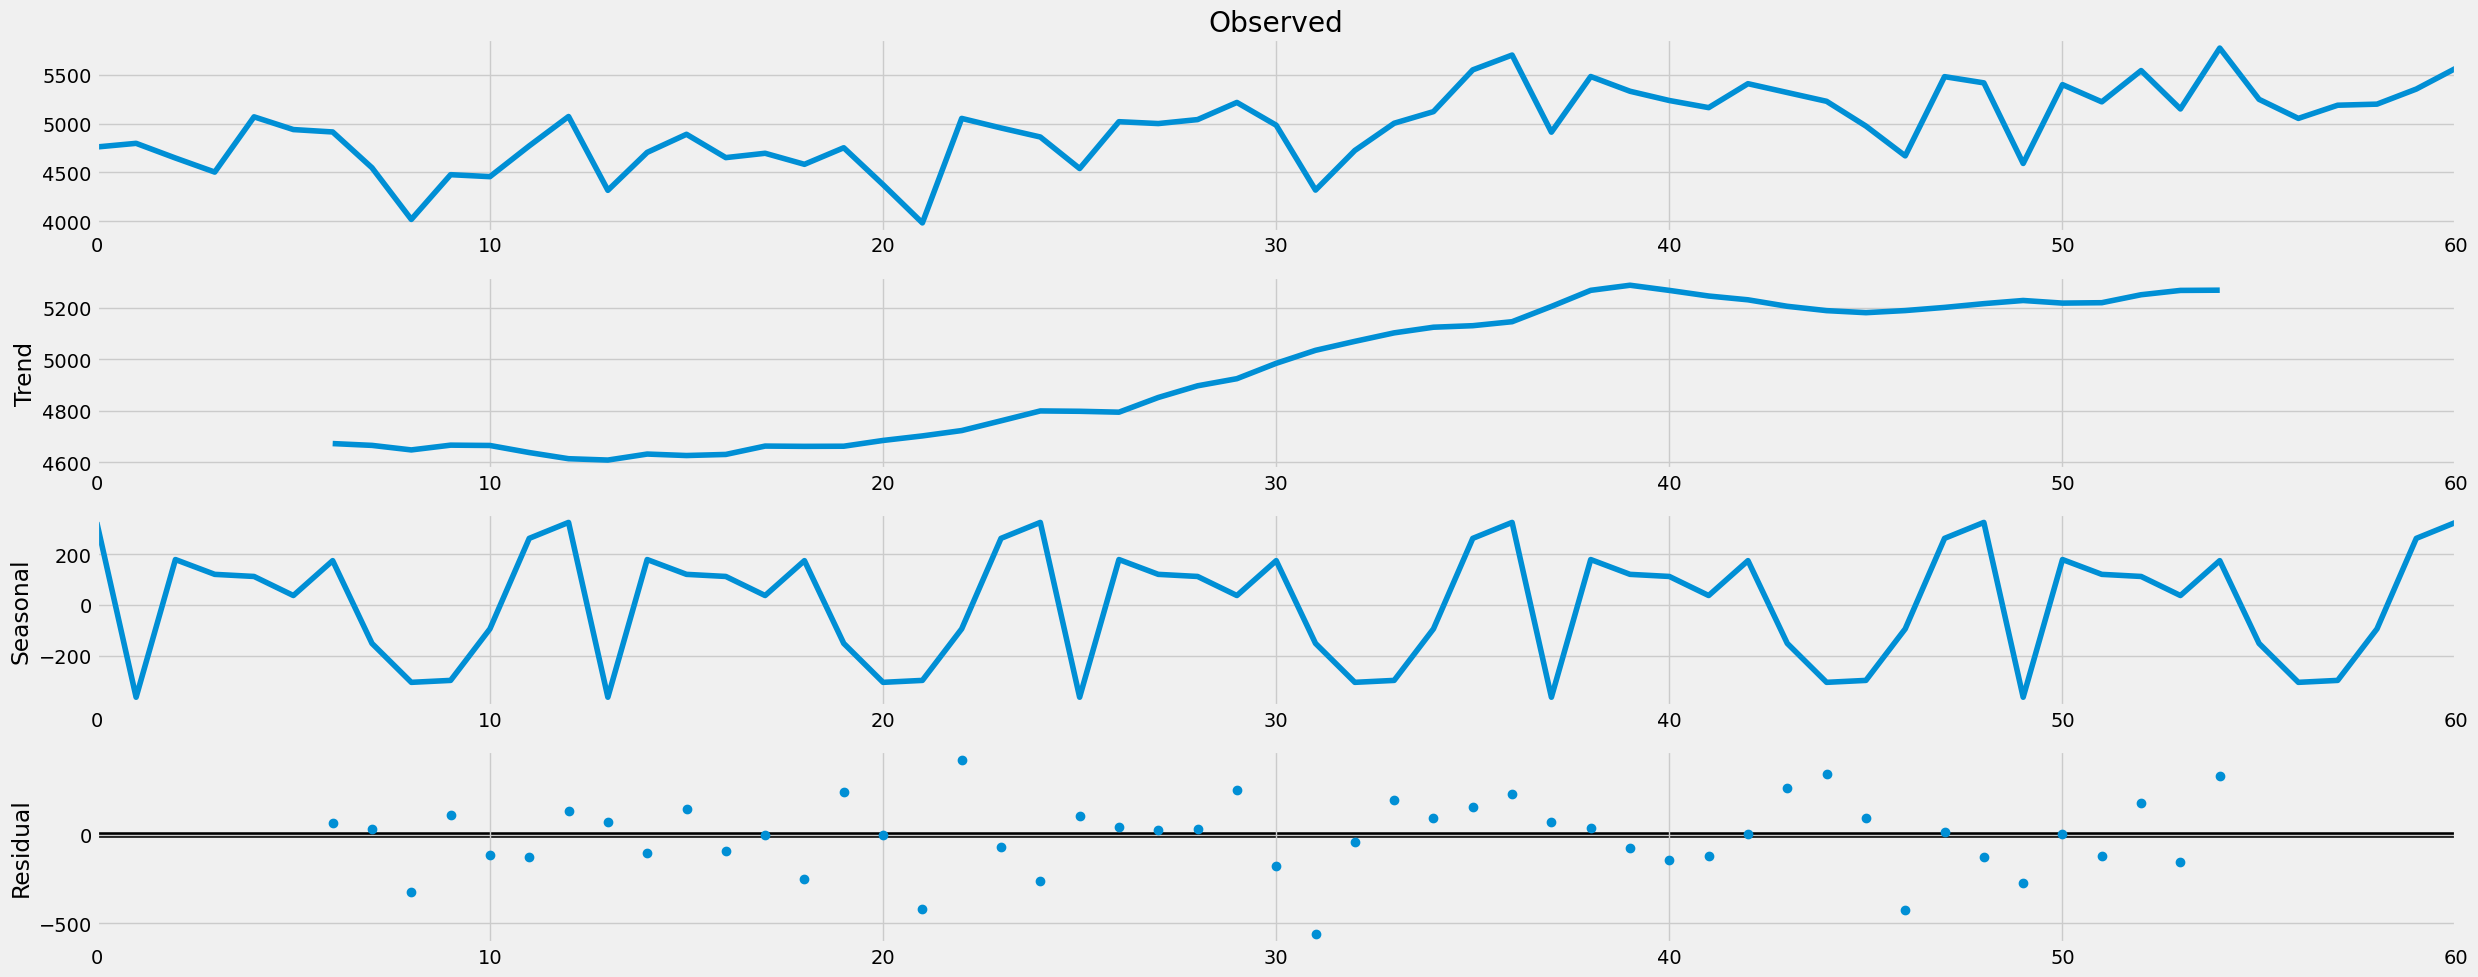

In [50]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 25, 10

decomposition = seasonal_decompose(df_month.Demand.values, model = 'additive', period = 12)
decomposition.plot()
plt.show()

In [51]:
con = pd.Series(decomposition.seasonal)
con1 = pd.Series(decomposition.trend)
con2 = pd.Series(decomposition.resid)
con3 = pd.Series(decomposition.observed)

decom_df = pd.concat([con,con1,con2,con3],axis = 1)
decom_df.columns = ['Seasonality', 'Trend', 'Residual', 'Actual_value']
decom_df.head(10)

,Seasonality,Trend,Residual,Actual_value
0,325.643061,NaN,NaN,4760.537787
1,-363.971184,NaN,NaN,4797.869006
2,179.154324,NaN,NaN,4647.560310
3,120.730584,NaN,NaN,4503.559554
4,112.427316,NaN,NaN,5069.122546
5,37.193951,NaN,NaN,4938.896517
6,174.793185,4671.704224,67.802568,4914.299977
7,-151.683979,4664.666060,34.873910,4547.855991
8,-305.241444,4647.026919,-322.805842,4018.979632
9,-297.558757,4665.556026,109.003811,4477.001080


### Stationary Test

In [52]:
from statsmodels.tsa.stattools import adfuller

adfuller_result = adfuller(df_month['Demand'])

print(f'ADF statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critical values:')
    print(f'    {key},  {value}')

ADF statistic: -2.1353562491537046
p-value: 0.23053730809929224
Critical values:
    1%,  -3.548493559596539
Critical values:
    5%,  -2.912836594776334
Critical values:
    10%,  -2.594129155766944


### Make Series Stationnary

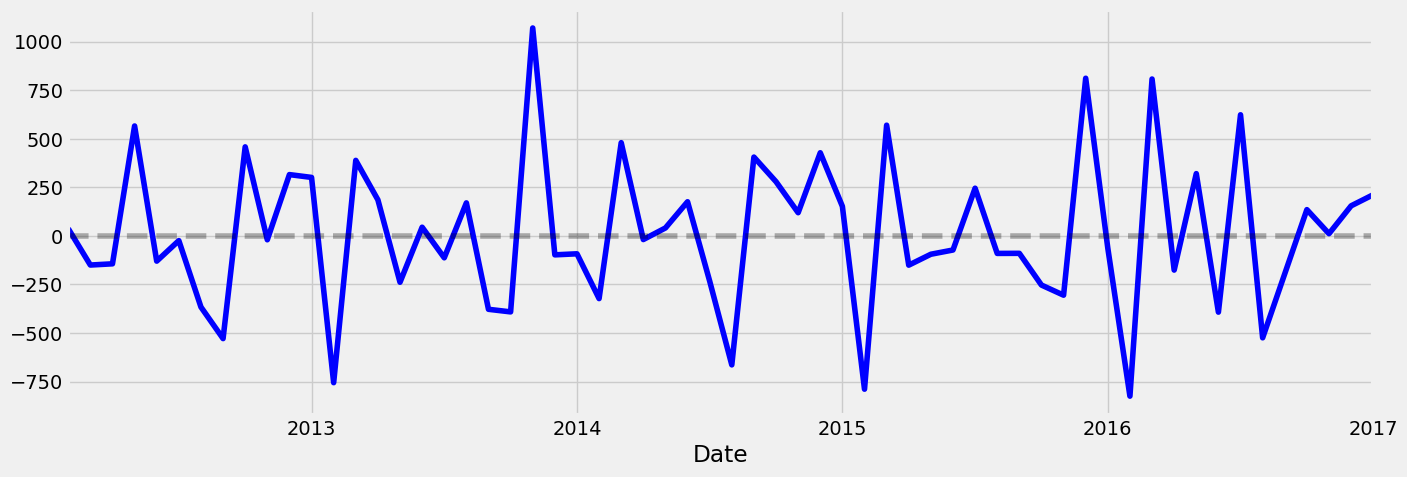

In [53]:
df_diff = df_month.Demand.diff()[1:]
df_diff.plot(figsize=(15,5), color = 'blue')
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

In [54]:
adfuller_result_new = adfuller(df_diff)

print(f'ADF statistic: {adfuller_result_new[0]}')
print(f'p-value: {adfuller_result_new[1]}')

for key, value in adfuller_result_new[4].items():
    print('Critical values:')
    print(f'    {key},  {value}')

ADF statistic: -6.758687705873298
p-value: 2.8284296959133243e-09
Critical values:
    1%,  -3.5506699942762414
Critical values:
    5%,  -2.913766394626147
Critical values:
    10%,  -2.5946240473991997


## Build ARIMA Model

1. ARIMA models are generally denoted as ARIMA (p,d,q) where:
    * p is the order of autoregressive model (Forecasts future behavior based on past behavior data)
    * d is the degree of differencing(Integrating or eleminate trend in the data)
    * and q is the order of moving-average model(Past errors to predict the future)
2. ARIMA models use differencing to convert a non-stationary time series into a stationary one, and then predict future values from historical data.
3. Ways to determine p,q,d:
    Using ACF And PCAF plots to find p,q and d is how many times we differenciate the data
    Auto_Arima function tries different orders and determine the best model based on AIC criteria(lowest AIC)
    For Loop

#### 1) ACF and PACF plots and Interpretation

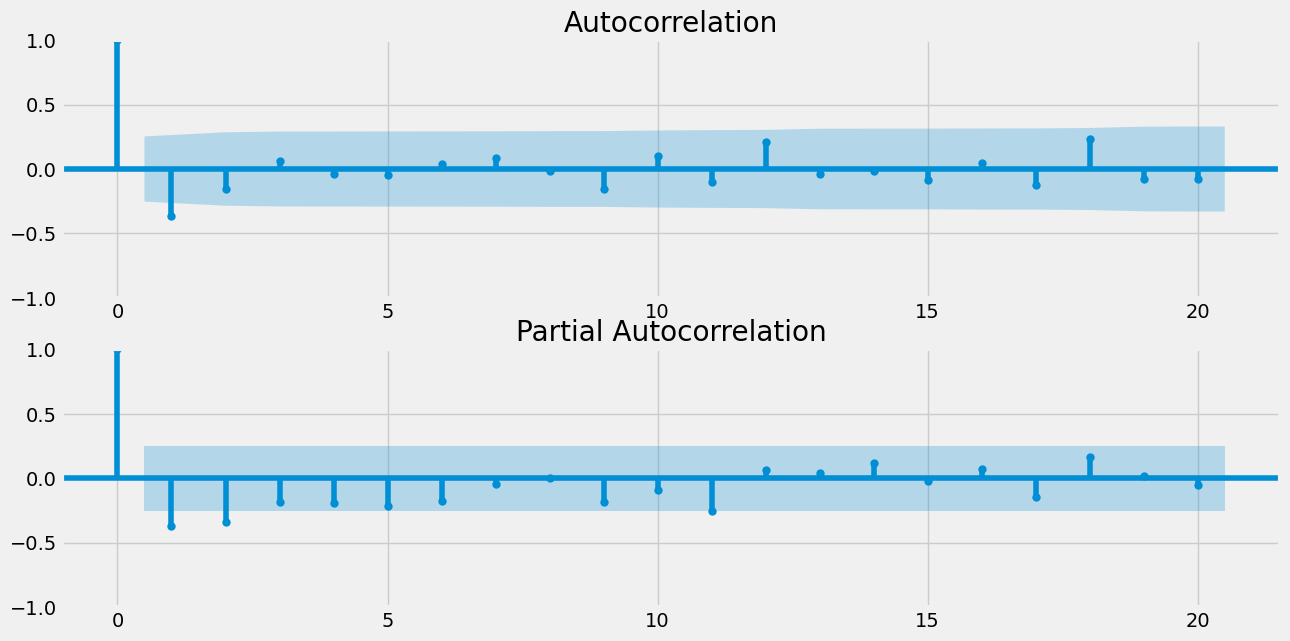

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_diff, lags=20, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_diff, lags=20, method = 'ywm', ax = ax2)
plt.show()

1. Based on the AutoCorrelation chart:

    * Lag 1 is strong(cross the Confidence Interval) so the order of q is 1
    * Based on the Partial AutoCorrelation chart, Lag 1 and 2 are strong(cross the Confidence Interval) so the order of p is 2
    * I differentiate only once to make the series stationnary so d is 1

#### 2) Train / Test split

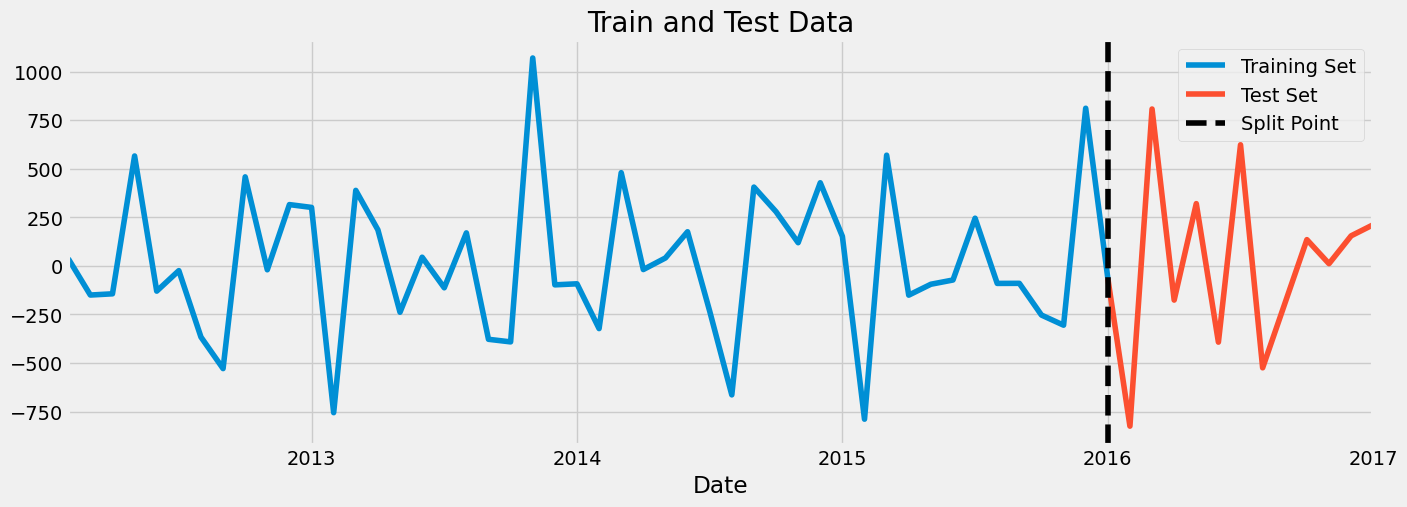

In [56]:
from datetime import datetime
from datetime import timedelta

train_end = datetime(2016,1,1)
test_end = datetime(2017,1,1)

df_train_ari = df_diff[:train_end]
df_test_ari = df_diff[train_end:test_end]

fig, ax = plt.subplots(figsize=(15,5))
df_train_ari.plot(ax = ax, label = 'Training Set', title = 'Train and Test Data')
df_test_ari.plot(ax = ax, label = 'Test set')
ax.axvline('01-01-2016', color='black', ls='--')
ax.legend(['Training Set', 'Test Set','Split Point'])
plt.show()

#### 3) Import Libraries and fit the model

In [57]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(df_train_ari, order = (2,1,1)).fit()

In [58]:
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                 Demand   No. Observations:                   48
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -343.242
Date:                Fri, 19 May 2023   AIC                            694.484
Time:                        21:37:47   BIC                            701.885
Sample:                    02-01-2012   HQIC                           697.269
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3710      0.168     -2.211      0.027      -0.700      -0.042
ar.L2         -0.3259      0.184     -1.768      0.077      -0.687       0.035
ma.L1         -0.9999      0.252     -3.964      0.0

Based on the summary:
- The values of the coefficients for AR lag1, lag2 and MA lag1 are negatives which indicates that the time series 
current period is negatively correlated with the time series at those lags
- The p values for AR lag 1 and MA lag 1, sigma2 are significants because it is below 0.05

In [59]:
pred_start = df_test_ari.index[0]
pred_end = df_test_ari.index[-1]

prediction = model_arima.predict(start = pred_start, end = pred_end)

residuals = df_test_ari - prediction
residuals

Date
2016-01-01    120.939581
2016-02-01   -603.946166
2016-03-01    684.840500
2016-04-01   -222.531709
2016-05-01    357.821725
2016-06-01   -411.192815
2016-07-01    598.300893
2016-08-01   -529.202917
2016-09-01   -204.793460
2016-10-01    120.399413
2016-11-01      0.189261
2016-12-01    143.746132
2017-01-01    199.795382
Freq: MS, dtype: float64

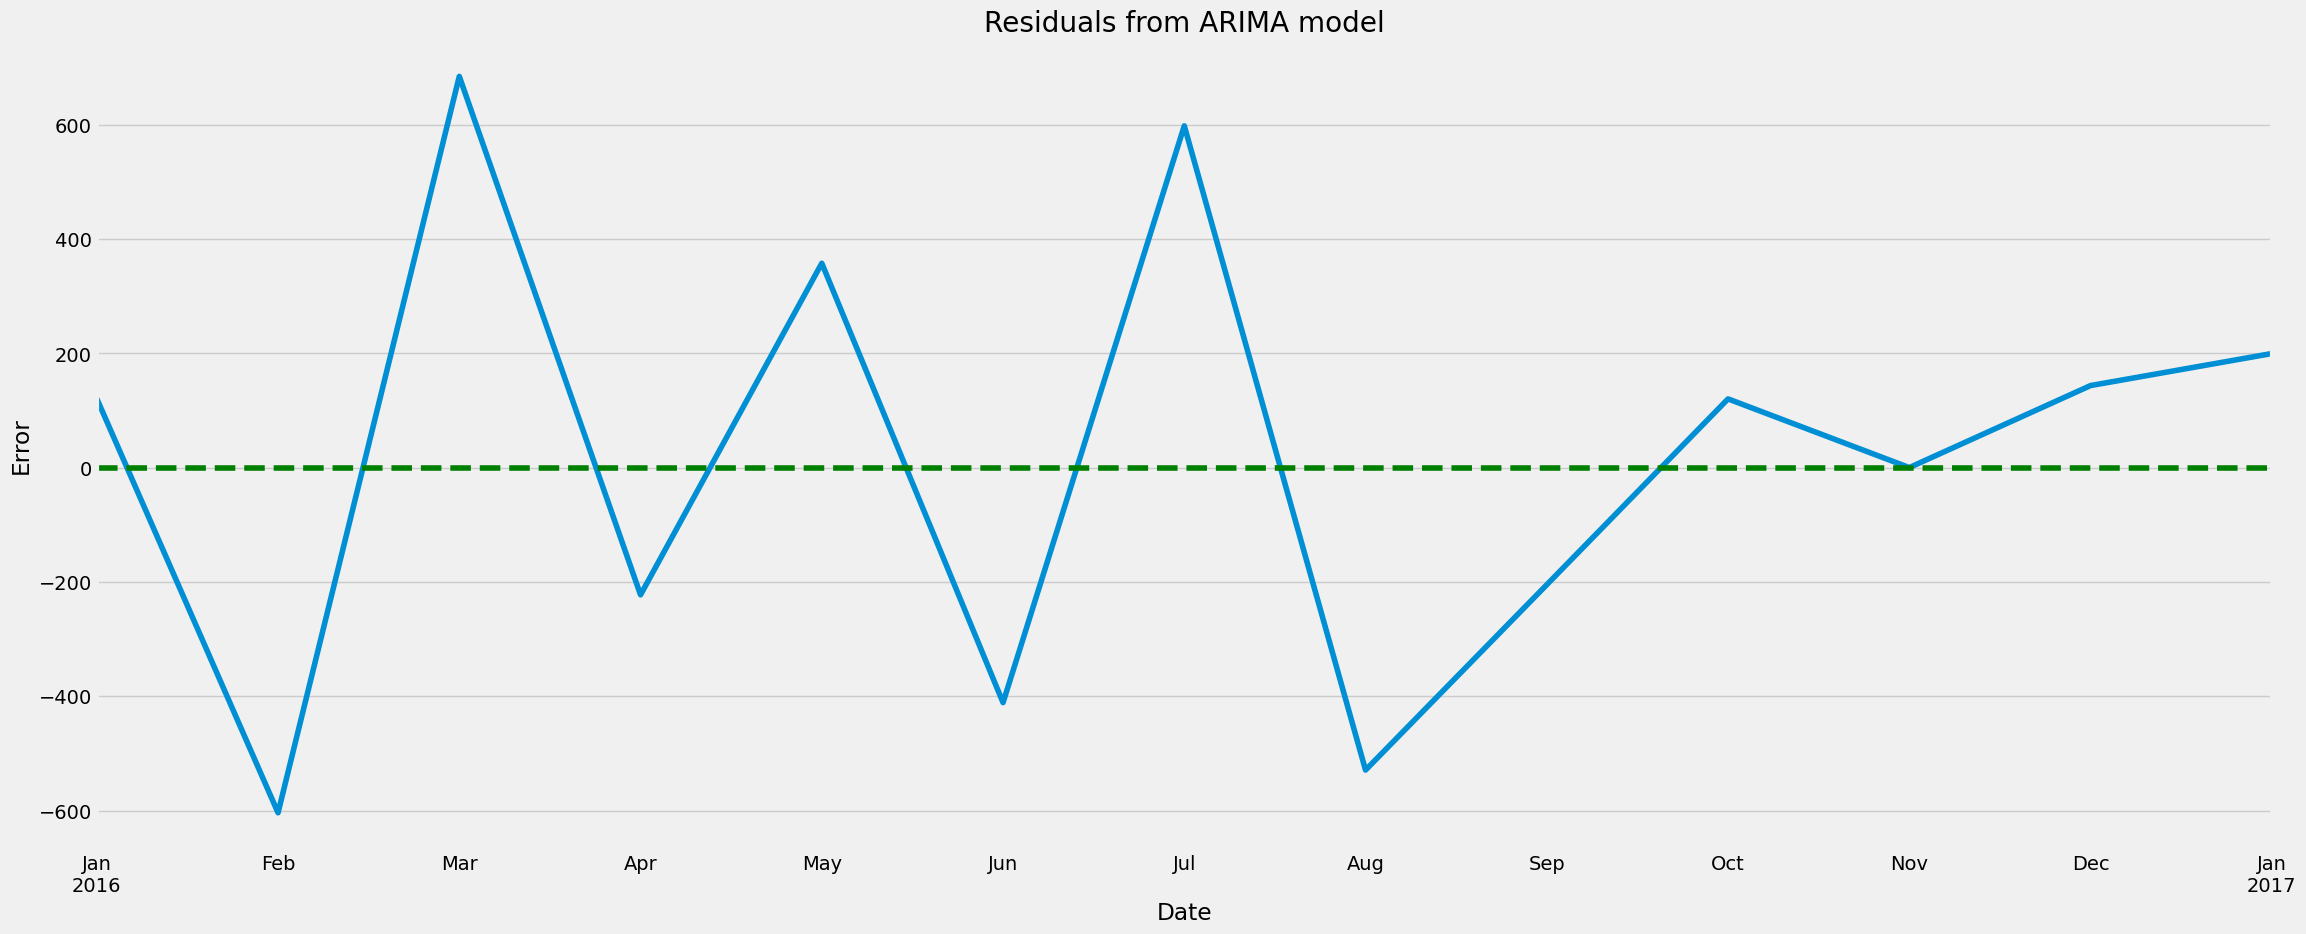

In [60]:
residuals.plot(kind = 'line', title = 'Residuals from ARIMA model')
plt.axhline(0,color ='g', linestyle = '--')
plt.ylabel('Error')
plt.show()

In [61]:
rmse = np.sqrt(np.mean(residuals**2))
rmse

387.3040336819824

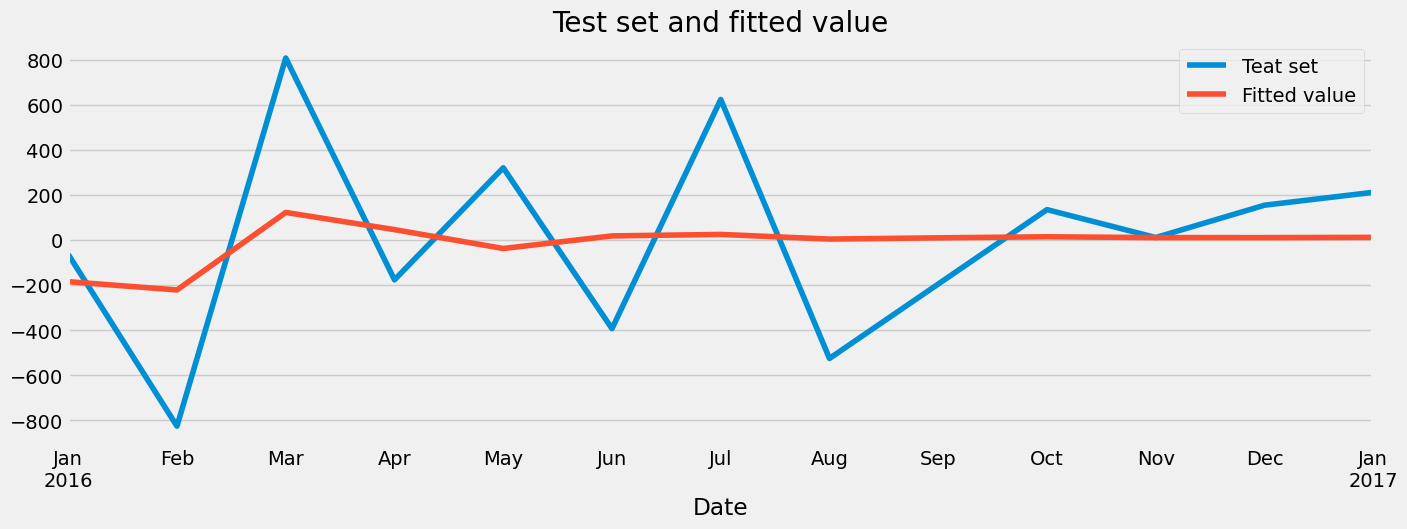

In [62]:
fig, ax = plt.subplots(figsize=(15,5))
df_test_ari.plot(ax=ax, label='Training set', title = 'Test set and fitted value')
prediction.plot(ax=ax, label = 'Prediction')
ax.legend(['Teat set', 'Fitted value'])
plt.show()

In [63]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose  

In [64]:
fit = auto_arima(df_train_ari, start_p=1, start_q=1,
                          max_p=5, max_q=5, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True) 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=555.090, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=540.164, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=553.128, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=552.377, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=541.558, Time=0.37 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=541.469, Time=0.16 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=545.652, Time=0.06 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=532.886, Time=0.12 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=541.616, Time=0.02 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=532.139, Time=0.50 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, T

In [65]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -260.061
Date:                            Fri, 19 May 2023   AIC                            530.122
Time:                                    21:38:00   BIC                            538.040
Sample:                                02-01-2012   HQIC                           532.886
                                     - 01-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6538      0.173     -3.775      0.000      -0.993      -0.314
ar.L2         -0.5919      0.211     -2.806      0.005      -1.005      -0.178
ar.S.L12      -0.9421      0.256     -3.686      0.000      -1.443      -0.441
ar.S.L24      -0.4285      0.201     -2.133      0.033      -0.822      -0.035
sigma2      8.326e+04   2.61e+04      3.195      0.001    3.22e+04    1.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.05
Prob(Q):                              0.94   Prob(JB):                         0.36
Heteroskedasticity (H):               1.63   Skew:                            -0.55
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Seasonal ARIMA to capture seasonality

In [126]:
import itertools 
p = range(0,2)
q = range(0,2)
d = range(0,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the model are')
for i in range (1, len(pdq)):
    print('model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the model are
model: (0, 0, 1)(0, 0, 1, 12)
model: (0, 1, 0)(0, 1, 0, 12)
model: (0, 1, 1)(0, 1, 1, 12)
model: (1, 0, 0)(1, 0, 0, 12)
model: (1, 0, 1)(1, 0, 1, 12)
model: (1, 1, 0)(1, 1, 0, 12)
model: (1, 1, 1)(1, 1, 1, 12)


* Get the best params for the data. Choose the lowest AIC.
* The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a 
    given set of data. 
* AIC measures how well a model fits the data while taking into account the overall complexity of the model.
* Large AIC: Model fits very well using a lot of features.
* Small AIC: Model fits similar fit but using lesser features. 
* Hence LOWER THE AIC, the better it is.

* The code tests the given params using sarimax and outputs the AIC scores.

In [129]:
sarima_aic = pd.DataFrame(columns=['parmam', 'seasonal', 'AIC'])
sarima_aic

,parmam,seasonal,AIC


In [130]:
import statsmodels.api as sm

for param in pdq:
    for params_seasonal in PDQ:
        sarima_model = sm.tsa.statespace.SARIMAX(df_diff.values,
                                                order = param,
                                                seasonal_order=params_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
        results_sarima = sarima_model.fit(maxiter=1000)
        print('sarima{}x{} - AIC:{}'.format(param, params_seasonal, results_sarima.aic))
        sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27029D+00    |proj g|=  4.23419D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      3      1     0     0   5.898D-07   7.270D+00
  F =   7.2702240810066172     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
sarima(0, 0, 0)x(0, 0, 0, 12) - AIC:874.4268897207941
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables

 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sa

sarima(0, 0, 0)x(0, 1, 1, 12) - AIC:1363.021213996899
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91267D+00    |proj g|=  3.63798D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   3.638D-06   5.913D+00
  F =   5.9126679439081196     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
sarima(0, 0, 0)x(1, 0, 0, 12) - AIC:713.5201532689744
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       

/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'p


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     72      2     1     0   9.454D+04   1.140D+01
  F =   11.400311001705198     

ABNORMAL_TERMINATION_IN_LNSRCH                              
sarima(0, 0, 0)x(1, 1, 1, 12) - AIC:1374.0373202046237
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.00633D+00    |proj g|=  1.85295D-01

At iterate    5    f=  6.97722D+00    |proj g|=  6.74627D-03

At iterate   10    f=  6.97544D+00    |proj g|=  7.43268D-02

At iterate   1


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/sachinkumar/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


sarima(0, 0, 1)x(0, 1, 1, 12) - AIC:1365.1138602199808
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76549D+00    |proj g|=  1.80788D-01

At iterate    5    f=  5.73815D+00    |proj g|=  6.97924D-04

At iterate   10    f=  5.73788D+00    |proj g|=  2.97806D-02

At iterate   15    f=  5.72906D+00    |proj g|=  4.05605D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   4.040D-06   5.729D+00
  F =   5.7285885139807835     

CONVERGENCE: N

/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'p

sarima(0, 0, 1)x(1, 1, 0, 12) - AIC:519.3360802603394
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17873D+01    |proj g|=  1.41644D-03
  ys=-1.591E+02  -gs= 5.647E-01 BFGS update SKIPPED
  ys=-1.895E+01  -gs= 5.507E-01 BFGS update SKIPPED


/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/sachinkumar/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5    119      3     2     0   5.695D+04   1.112D+01
  F =   11.121815136331547     

ABNORMAL_TERMINATION_IN_LNSRCH                              
sarima(0, 0, 1)x(1, 1, 1, 12) - AIC:1342.6178163597856
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.63974D+00    |proj g|=  4.95613D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explore


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/sachinkumar/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyp


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4     77      2     2     0   1.149D+04   1.222D+01
  F =   12.221749748864299     

ABNORMAL_TERMINATION_IN_LNSRCH                              
sarima(0, 1, 0)x(0, 1, 1, 12) - AIC:1470.6099698637158
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18546D+00    |proj g|=  3.41149D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explore


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/sachinkumar/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyp


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     86      3     3     0   1.419D+05   1.196D+01
  F =   11.957159856635036     

ABNORMAL_TERMINATION_IN_LNSRCH                              
sarima(0, 1, 0)x(1, 1, 1, 12) - AIC:1440.8591827962043
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08789D+00    |proj g|=  3.65111D-01

At iterate    5    f=  7.07723D+00    |proj g|=  1.72165D-03

At iterate   10    f=  7.07714D+00    |proj g|=  3.88383D-02

At iterate   1

/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'p


At iterate   20    f=  5.56934D+00    |proj g|=  1.21382D-02

At iterate   25    f=  5.56659D+00    |proj g|=  1.67985D-01

At iterate   30    f=  5.54938D+00    |proj g|=  3.77206D-02

At iterate   35    f=  5.54860D+00    |proj g|=  1.10727D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     46      1     0     0   4.928D-06   5.549D+00
  F =   5.5485966493057530     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
sarima(0, 1, 1)x(1, 0, 1, 12) - AIC:673.8315979166904
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0 

/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'p


At iterate    5    f=  1.11820D+01    |proj g|=  9.28231D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     41      2     1     0   6.326D-06   1.118D+01
  F =   11.177376126735872     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
sarima(0, 1, 1)x(1, 1, 1, 12) - AIC:1349.2851352083046
RUNNING THE L-BFGS-B CODE

           * * *

sarima(1, 0, 0)x(0, 0, 0, 12) - AIC:867.9006234626297
Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19917D+00    |proj g|=  5.65406D-06

           * * *

Tit 

 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/sachinkumar/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/va


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     90      4     3     0   6.120D+04   1.163D+01
  F =   11.634948871866772     

ABNORMAL_TERMINATION_IN_LNSRCH                              
sarima(1, 0, 0)x(0, 1, 1, 12) - AIC:1402.1938646240126
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69671D+00    |proj g|=  2.18978D-02

At iterate    5    f=  5.69642D+00    |proj g|=  7.20078D-04

At iterate   10    f=  5.69632D+00    |proj g|=  1.14561D-02

At iterate   1

/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'p


At iterate    5    f=  5.62904D+00    |proj g|=  6.73267D-04

At iterate   10    f=  5.62904D+00    |proj g|=  2.70277D-03

At iterate   15    f=  5.62862D+00    |proj g|=  3.41564D-02

At iterate   20    f=  5.62475D+00    |proj g|=  8.34507D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     25      1     0     0   1.031D-06   5.625D+00
  F =   5.6246428736630314     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
sarima(1, 0, 1)x(0, 1, 0, 12) - AIC:680.9571448395637
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/sachinkumar/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyp


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     88      2     2     0   5.806D+04   1.131D+01
  F =   11.312785858427613     

ABNORMAL_TERMINATION_IN_LNSRCH                              
sarima(1, 0, 1)x(0, 1, 1, 12) - AIC:1365.5343030113136
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62865D+00    |proj g|=  1.49375D-01

At iterate    5    f=  5.60903D+00    |proj g|=  9.27102D-04

At iterate   10    f=  5.60902D+00    |proj g|=  2.20305D-03

At iterate   1

/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   15    f=  4.17314D+00    |proj g|=  9.17606D-02

At iterate   20    f=  4.15987D+00    |proj g|=  2.53170D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     25      1     0     0   1.987D-06   4.160D+00
  F =   4.1598618449531735     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
sarima(1, 0, 1)x(1, 1, 0, 12) - AIC:507.18342139438084
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17870D+01    |proj g|=  1.41728D-03
  ys=-2.338E+01


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/sachinkumar/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyp


At iterate   10    f=  5.88745D+00    |proj g|=  1.85819D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     19      1     0     0   8.816D-06   5.887D+00
  F =   5.8872284940121240     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
sarima(1, 1, 0)x(0, 0, 1, 12) - AIC:712.4674192814549
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.06571D+00    |proj g|=  5.32383D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.89502D+00    |proj g|=  5.09051D-02

At iterate    5    f=  5.89266D+00    |proj g|=  6.14727D-04

At iterate   10    f=  5.89259D+00    |proj g|=  8.41412D-03

At iterate   15    f=  5.89251D+00    |proj g|=  9.80531D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   9.805D-06   5.893D+00
  F =   5.8925128649409064     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
sarima(1

/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/sachinkumar/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/fw/l_8k9vqd3cb336c9kyp


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     80      2     0     0   7.392D+04   1.103D+01
  F =   11.033665343351112     

ABNORMAL_TERMINATION_IN_LNSRCH                              
sarima(1, 1, 0)x(1, 1, 1, 12) - AIC:1332.0398412021334
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05908D+00    |proj g|=  2.84419D-01

At iterate    5    f=  7.02257D+00    |proj g|=  8.84099D-04

At iterate   10    f=  7.02255D+00    |proj g|=  8.99128D-03

At iterate   1

/Users/sachinkumar/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is d


At iterate    5    f=  5.64417D+00    |proj g|=  6.06577D-04

At iterate   10    f=  5.64416D+00    |proj g|=  8.45015D-03

At iterate   15    f=  5.64314D+00    |proj g|=  8.68148D-02

At iterate   20    f=  5.62111D+00    |proj g|=  1.60947D-01

At iterate   25    f=  5.61236D+00    |proj g|=  1.83222D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     29      1     0     0   7.754D-07   5.612D+00
  F =   5.6123646035945711     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
sarima(1, 1, 1)x(1, 0, 0, 12) - AIC:681.4837524313485
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.
/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)
 This problem is unconstrained.



At iterate   10    f=  4.20671D+00    |proj g|=  1.23648D-02

At iterate   15    f=  4.16085D+00    |proj g|=  1.66950D-01

At iterate   20    f=  4.11970D+00    |proj g|=  3.74401D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     28      1     0     0   1.970D-05   4.120D+00
  F =   4.1196951505180950     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
sarima(1, 1, 1)x(1, 1, 0, 12) - AIC:502.3634180621714
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/1901665187.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'param': param, 'seasonal': params_seasonal, 'AIC': results_sarima.aic}, ignore_index=True)


In [133]:
sarima_aic.drop('parmam', axis = 'columns',inplace = True)
sarima_aic.sort_values('AIC',axis = 0,ascending=True)

,seasonal,AIC,param
62,"(1, 1, 0, 12)",502.363418,"(1, 1, 1)"
46,"(1, 1, 0, 12)",507.183421,"(1, 0, 1)"
38,"(1, 1, 0, 12)",511.726497,"(1, 0, 0)"
14,"(1, 1, 0, 12)",519.336080,"(0, 0, 1)"
30,"(1, 1, 0, 12)",520.419427,"(0, 1, 1)"
...,...,...,...
7,"(1, 1, 1, 12)",1374.037320,"(0, 0, 0)"
35,"(0, 1, 1, 12)",1402.193865,"(1, 0, 0)"
39,"(1, 1, 1, 12)",1425.536952,"(1, 0, 0)"
23,"(1, 1, 1, 12)",1440.859183,"(0, 1, 0)"


In [67]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarimax = SARIMAX(df_train_ari,
                       order=(1,1,1),
                       seasonal_order=(1,1,1,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False).fit()
print(model_sarimax.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.35043D+00    |proj g|=  2.04028D-01

At iterate    5    f=  3.29415D+00    |proj g|=  4.57071D-03

At iterate   10    f=  3.29401D+00    |proj g|=  4.42399D-04

At iterate   15    f=  3.29390D+00    |proj g|=  1.13908D-02

At iterate   20    f=  3.28326D+00    |proj g|=  9.12254D-02

At iterate   25    f=  3.21163D+00    |proj g|=  3.50092D-02

At iterate   30    f=  3.20873D+00    |proj g|=  3.84668D-03

At iterate   35    f=  3.20853D+00    |proj g|=  7.13430D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/sachinkumar/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


In [68]:
pred_sarimax = model_sarimax.predict(start=pred_start, end=pred_end)

In [69]:
pred_sarimax

2016-01-01    -83.919413
2016-02-01   -502.656392
2016-03-01    328.977320
2016-04-01    -19.185645
2016-05-01     80.857737
2016-06-01     15.111073
2016-07-01    -57.459712
2016-08-01   -241.864333
2016-09-01   -144.173876
2016-10-01     47.696194
2016-11-01    268.287860
2016-12-01    314.612978
2017-01-01     72.957548
Freq: MS, Name: predicted_mean, dtype: float64

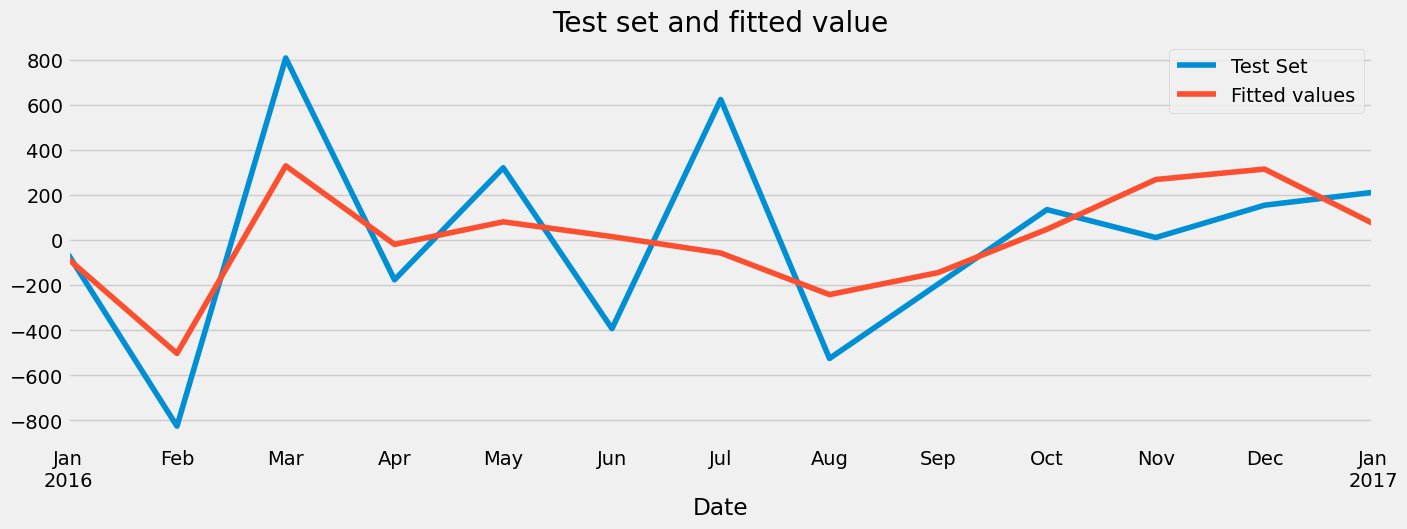

In [70]:
fig, ax = plt.subplots(figsize=(15,5))
df_test_ari.plot(ax=ax, label='Training set', title = 'Test set and fitted value')
pred_sarimax.plot(ax=ax, label = 'prediction')
ax.legend(['Test Set', 'Fitted values'])
plt.show()

In [71]:
residual_sarimax = df_test_ari - pred_sarimax
rmse_sarimax = np.sqrt(np.mean(residual_sarimax**2))
rmse_sarimax

309.6197214493506

#### Taking Results back to original scale

In [72]:
pred_sarimax.iloc[0] = df_month.query('index == "2016-01-01"')['Demand']

model_predicted = pred_sarimax.cumsum()
model_predicted.head()

2016-01-01    5416.990630
2016-02-01    4914.334238
2016-03-01    5243.311558
2016-04-01    5224.125913
2016-05-01    5304.983650
Freq: MS, Name: predicted_mean, dtype: float64

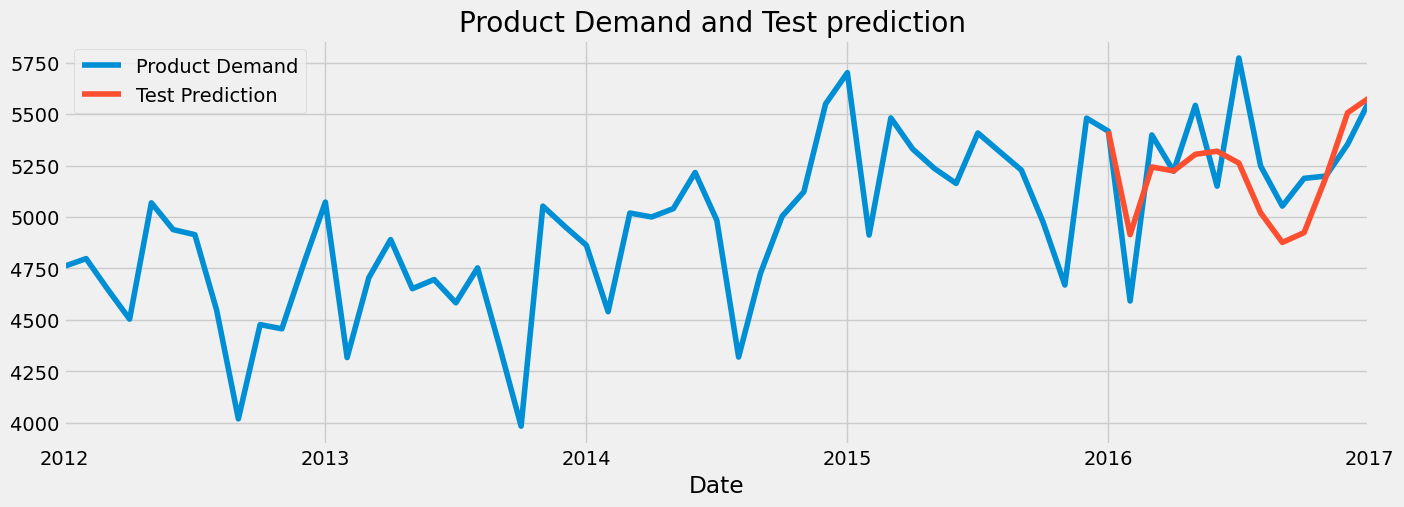

In [73]:
fig, ax = plt.subplots(figsize=(15,5))
df_month.Demand.plot(ax=ax, label='product demand', title = 'Product Demand and Test prediction ')
model_predicted.plot(ax=ax, label = 'Test Prediction')
ax.legend(['Product Demand', 'Test Prediction'])
plt.show()

In [74]:
df5 = df4.sort_values('Date', ascending=True)
df5.head()

,Code,Warehouse,Category,Demand,day_of_the_week,Quarter,Month,Year,week
Date,,,,,,,,,
2012-01-01,Product_2166,Whse_S,Category_024,2,6,1,1,2012,52
2012-01-02,Product_1432,Whse_S,Category_019,30000,0,1,1,2012,1
2012-01-02,Product_0115,Whse_S,Category_032,54,0,1,1,2012,1
2012-01-02,Product_2001,Whse_S,Category_005,500,0,1,1,2012,1
2012-01-02,Product_1787,Whse_S,Category_006,2500,0,1,1,2012,1


In [75]:
df_diff.head()

Date
2012-02-01     37.331220
2012-03-01   -150.308697
2012-04-01   -144.000756
2012-05-01    565.562992
2012-06-01   -130.226029
Freq: MS, Name: Demand, dtype: float64

## ML models

In [76]:
df_ml = pd.DataFrame(df_diff)

In [77]:
adfuller_result_new = adfuller(df_ml)

print(f'ADF statistic: {adfuller_result_new[0]}')
print(f'p-value: {adfuller_result_new[1]}')

for key, value in adfuller_result_new[4].items():
    print('Critical values:')
    print(f'    {key},  {value}')

ADF statistic: -6.758687705873298
p-value: 2.8284296959133243e-09
Critical values:
    1%,  -3.5506699942762414
Critical values:
    5%,  -2.913766394626147
Critical values:
    10%,  -2.5946240473991997


In [78]:
df_ml.head()

,Demand
Date,
2012-02-01,37.331220
2012-03-01,-150.308697
2012-04-01,-144.000756
2012-05-01,565.562992
2012-06-01,-130.226029


In [79]:
df_ml.shape

(60, 1)

<Axes: xlabel='Date'>

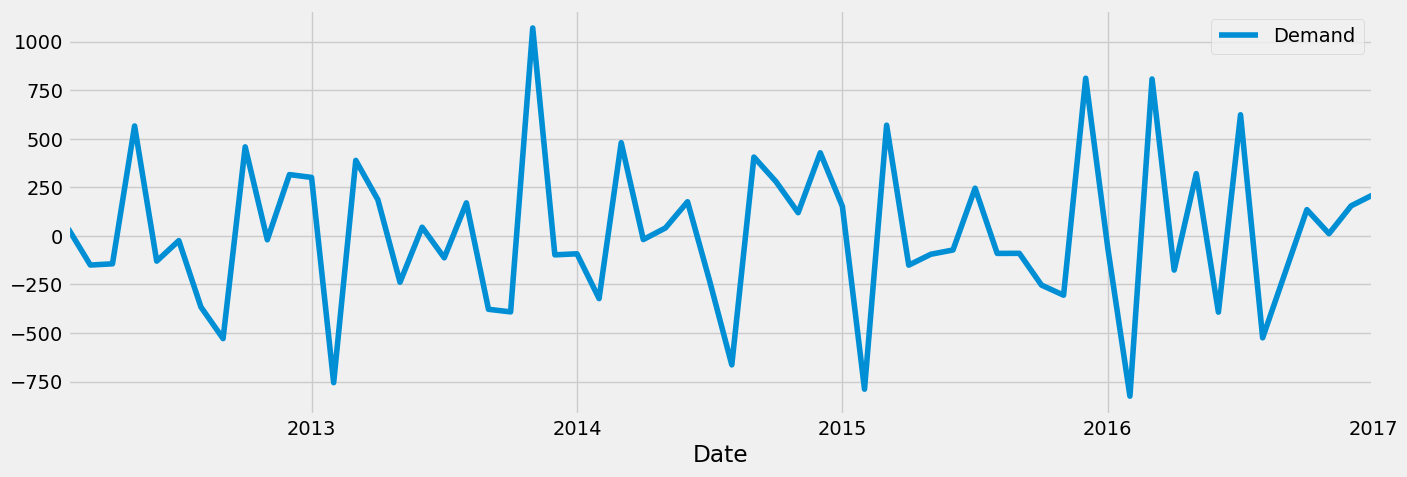

In [80]:
df_ml.plot(kind = 'line',figsize=(15,5))

In [81]:
df_ml['Demand_LastMonth']=df_ml['Demand'].shift(+1)
df_ml['Demand_2Monthsback']=df_ml['Demand'].shift(+2)
df_ml['Demand_3Monthsback']=df_ml['Demand'].shift(+3)
df_ml.head()

,Demand,Demand_LastMonth,Demand_2Monthsback,Demand_3Monthsback
Date,,,,
2012-02-01,37.331220,NaN,NaN,NaN
2012-03-01,-150.308697,37.331220,NaN,NaN
2012-04-01,-144.000756,-150.308697,37.331220,NaN
2012-05-01,565.562992,-144.000756,-150.308697,37.331220
2012-06-01,-130.226029,565.562992,-144.000756,-150.308697


In [82]:
df_ml = df_ml.dropna()
df_ml.isna().sum()

Demand                0
Demand_LastMonth      0
Demand_2Monthsback    0
Demand_3Monthsback    0
dtype: int64

In [83]:
df_ml.head()

,Demand,Demand_LastMonth,Demand_2Monthsback,Demand_3Monthsback
Date,,,,
2012-05-01,565.562992,-144.000756,-150.308697,37.331220
2012-06-01,-130.226029,565.562992,-144.000756,-150.308697
2012-07-01,-24.596540,-130.226029,565.562992,-144.000756
2012-08-01,-366.443987,-24.596540,-130.226029,565.562992
2012-09-01,-528.876358,-366.443987,-24.596540,-130.226029


In [84]:
df_ml.shape

(57, 4)

In [85]:
x1,x2,x3,y=df_ml['Demand_LastMonth'],df_ml['Demand_2Monthsback'],df_ml['Demand_3Monthsback'],df_ml['Demand']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[-144.00075566 -150.30869662   37.33121963]
 [ 565.56299219 -144.00075566 -150.30869662]
 [-130.22602908  565.56299219 -144.00075566]
 [ -24.59653964 -130.22602908  565.56299219]
 [-366.44398664  -24.59653964 -130.22602908]
 [-528.87635843 -366.44398664  -24.59653964]
 [ 458.02144785 -528.87635843 -366.44398664]
 [ -20.25515692  458.02144785 -528.87635843]
 [ 315.21281215  -20.25515692  458.02144785]
 [ 300.70630843  315.21281215  -20.25515692]
 [-755.83923629  300.70630843  315.21281215]
 [ 388.43831842 -755.83923629  300.70630843]
 [ 185.29018556  388.43831842 -755.83923629]
 [-238.81715875  185.29018556  388.43831842]
 [  44.43859775 -238.81715875  185.29018556]
 [-113.04465284   44.43859775 -238.81715875]
 [ 169.643212   -113.04465284   44.43859775]
 [-378.08540441  169.643212   -113.04465284]
 [-391.40926708 -378.08540441  169.643212  ]
 [1069.78256298 -391.40926708 -378.08540441]
 [ -97.83895716 1069.78256298 -391.40926708]
 [ -92.40289208  -97.83895716 1069.78256298]
 [-322.992

In [86]:
X_train,X_test,y_train,y_test=final_x[:-12],final_x[-12:],y[:-12],y[-12:]

In [87]:
X_train[:5], y_train[:5]

(array([[-144.00075566, -150.30869662,   37.33121963],
        [ 565.56299219, -144.00075566, -150.30869662],
        [-130.22602908,  565.56299219, -144.00075566],
        [ -24.59653964, -130.22602908,  565.56299219],
        [-366.44398664,  -24.59653964, -130.22602908]]),
 array([[ 565.56299219],
        [-130.22602908],
        [ -24.59653964],
        [-366.44398664],
        [-528.87635843]]))

In [88]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

45
12
45
12


### Linear regrission

In [89]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [90]:
lin_model.score(X_train,y_train) * 100

21.195093071603466

In [91]:
lin_pred = lin_model.predict(X_test)

In [92]:
residuals_lin = y_test - lin_pred
rmse_lin = np.sqrt(np.mean(residuals_lin**2))
rmse_lin

352.84936797717955

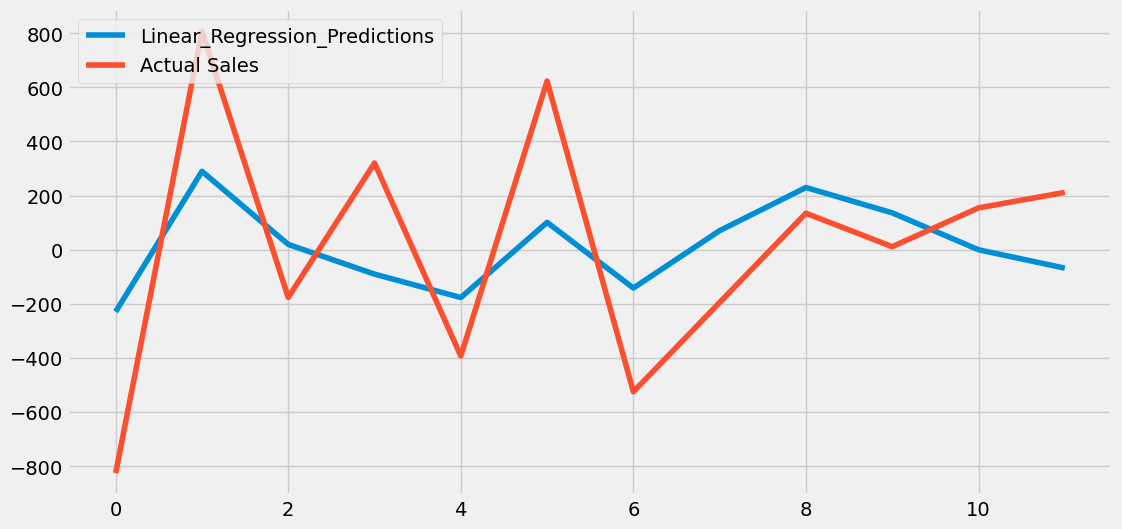

In [180]:
plt.figure(figsize=(12,6))
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

### Random forest 

In [108]:
from sklearn.ensemble import RandomForestRegressor
rand_model = RandomForestRegressor(n_estimators = 1000,max_features=3, random_state= 1)

In [109]:
rand_model.fit(X_train, y_train)
rand_model.score(X_train, y_train)

/var/folders/fw/l_8k9vqd3cb336c9kyplyvxm0000gn/T/ipykernel_19065/2715061186.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_model.fit(X_train, y_train)


0.8972238114862858

In [110]:
rand_pred = rand_model.predict(X_test)
rand_pred[:10]

array([ -1.45429692, 445.64213894, -10.53585443, -61.82666368,
        -7.11396778, 173.58720047,  25.01995147, 194.20502829,
       142.7004941 ,  55.23775755])

In [118]:
rand_pred_fi = rand_pred.cumsum()
rand_pred_fi

array([  -1.45429692,  444.18784202,  433.6519876 ,  371.82532391,
        364.71135613,  538.2985566 ,  563.31850807,  757.52353636,
        900.22403046,  955.46178801, 1074.34290603,  816.38316495])

In [124]:
residuals_rand = y_test - rand_pred
rmse_rand = np.sqrt(np.mean(residuals_rand**2))
rmse_rand

479.9686396485131

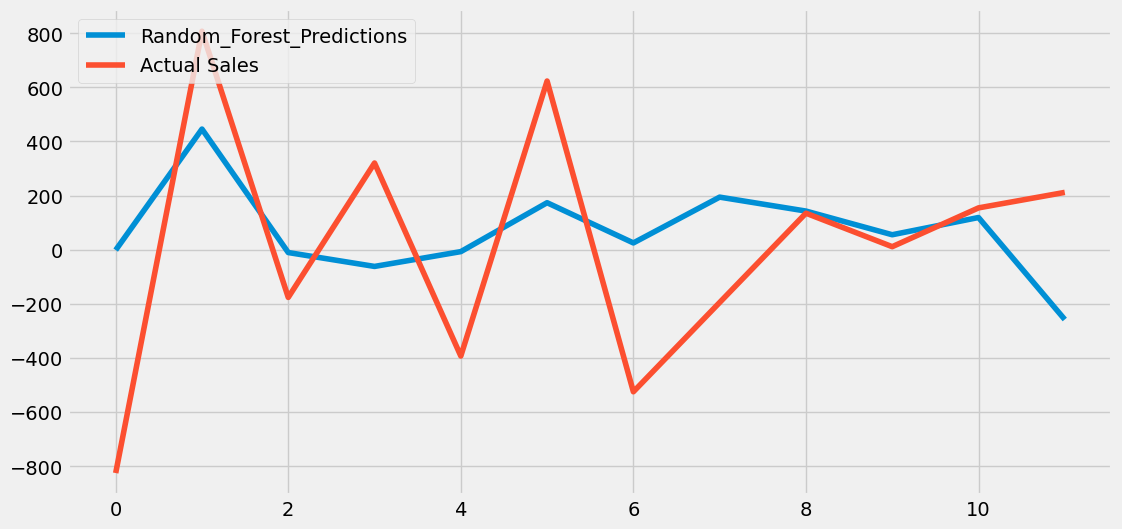

In [125]:
plt.figure(figsize=(12,6))
plt.plot(rand_pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

### XGboost

In [113]:
from xgboost import XGBRegressor

xg_model = XGBRegressor(n_estimators = 1000,early_stopping_rounds = 50,learning_rate = 0.01)
xg_model.fit(X_train,y_train, eval_set = [(X_train,y_train),(X_test,y_test)], verbose = 50)

[0]	validation_0-rmse:382.48031	validation_1-rmse:446.77391
[50]	validation_0-rmse:279.38121	validation_1-rmse:407.36091
[100]	validation_0-rmse:208.82819	validation_1-rmse:393.03696
[150]	validation_0-rmse:155.24690	validation_1-rmse:389.17292
[200]	validation_0-rmse:119.21676	validation_1-rmse:387.47781
[250]	validation_0-rmse:94.58289	validation_1-rmse:386.03652
[300]	validation_0-rmse:75.64455	validation_1-rmse:386.44039
[318]	validation_0-rmse:69.45767	validation_1-rmse:386.59214


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [114]:
print(xg_model.score(X_train,y_train))
print(xg_model.score(X_test, y_test))

0.9484139916040629
0.2575701878400988


In [115]:
xg_pred = xg_model.predict(X_test)
xg_pred[:5]

array([-24.717693, 443.39795 , -92.92429 , -72.821106, -66.09156 ],
      dtype=float32)

In [121]:
xg_pred_fi = xg_pred.cumsum()
xg_pred_fi

array([ -24.717693,  418.68027 ,  325.75598 ,  252.93488 ,  186.84332 ,
        751.5211  ,  684.90027 ,  952.7081  , 1383.4644  , 1366.1425  ,
       1552.7296  , 1285.9094  ], dtype=float32)

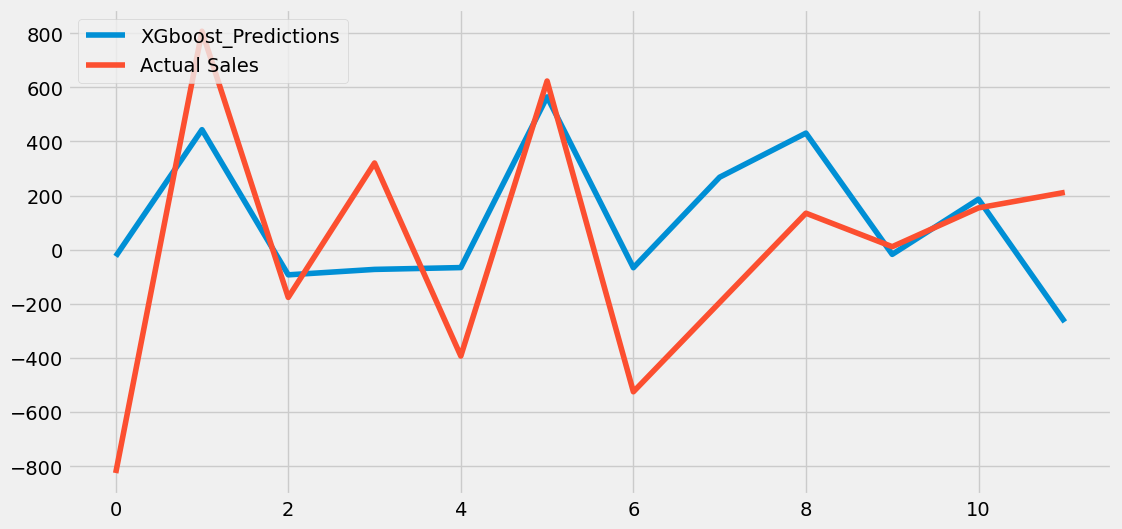

In [134]:
plt.figure(figsize=(12,6))
plt.plot(xg_pred,label='XGboost_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [123]:
residuals_xg = y_test - xg_pred
rmse_xg = np.sqrt(np.mean(residuals_xg**2))
rmse_xg

522.8187846510175

## Category wise forecast

In [135]:
cont = pd.DataFrame(df.groupby('Category')['Demand'].sum().sort_values(ascending=False))
cont["% Contribution"] = (cont['Demand']/cont['Demand'].sum()*100)
cont

,Demand,% Contribution
Category,,
Category_019,4251207605,82.622589
Category_006,405579330,7.882470
Category_005,199681320,3.880824
Category_007,128691531,2.501131
Category_028,49150112,0.955237
Category_033,42610000,0.828129
Category_030,40966555,0.796189
Category_021,4480660,0.087082
Category_032,4473048,0.086934


In [136]:
DF.columns = DF.columns.droplevel(0)
DF["Category_019"].dropna()

Date
2011-06-24     92000.0
2011-09-02      1250.0
2011-10-31         3.0
2011-11-24     40000.0
2011-11-25     17250.0
                ...   
2016-12-30    621700.0
2017-01-04     19000.0
2017-01-05     18800.0
2017-01-06    169000.0
2017-01-09      4000.0
Name: Category_019, Length: 1606, dtype: float64

In [137]:
y = DF.resample('M').sum() # Resampling the data on monthly basis 
y.index.freq = "M" # Setting datetime frequency to Month
y.head(20)

Category,Category_001,Category_002,Category_003,Category_004,Category_005,Category_006,Category_007,Category_008,Category_009,Category_010,...,Category_024,Category_025,Category_026,Category_027,Category_028,Category_029,Category_030,Category_031,Category_032,Category_033
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-31,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-05-31,0.0,0.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-09-30,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
y.shape

(73, 33)

### Category 019

In [140]:
df_019 = pd.DataFrame(y["Category_019"].iloc[12:-1]) # Including data from 2012 to 2016 end except last value
df_019.head()

,Category_019
Date,
2012-01-31,61243661.0
2012-02-29,72219508.0
2012-03-31,72444888.0
2012-04-30,61382420.0
2012-05-31,72041920.0


<Axes: xlabel='Date'>

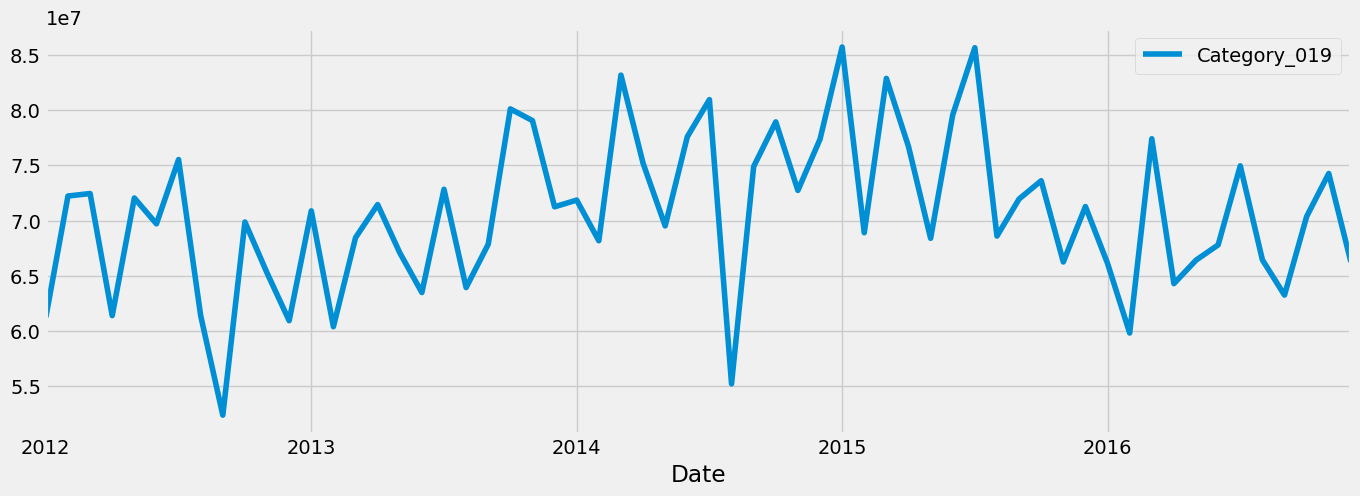

In [141]:
df_019.plot(figsize=(15,5))

In [142]:
df_019.head()

,Category_019
Date,
2012-01-31,61243661.0
2012-02-29,72219508.0
2012-03-31,72444888.0
2012-04-30,61382420.0
2012-05-31,72041920.0


In [143]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [144]:
fcast_model = SARIMAX(df_019.Category_019,order=(1,1,1),seasonal_order=(1,1,1,12))
results = fcast_model.fit()
fcast = results.predict(len(df_019["Category_019"]),
                        len(df_019["Category_019"])+4,typ='levels').rename('SARIMA(1,1,1)(1,1,1,12) Forecast')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37855D+01    |proj g|=  5.73290D-01

At iterate    5    f=  1.36124D+01    |proj g|=  1.36863D-01

At iterate   10    f=  1.35857D+01    |proj g|=  1.14408D-02

At iterate   15    f=  1.35839D+01    |proj g|=  2.02300D-03

At iterate   20    f=  1.35839D+01    |proj g|=  1.24365D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   2.564D-05   1.358D+01
  F =   13.583932488699611     

CONVERG

/Users/sachinkumar/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


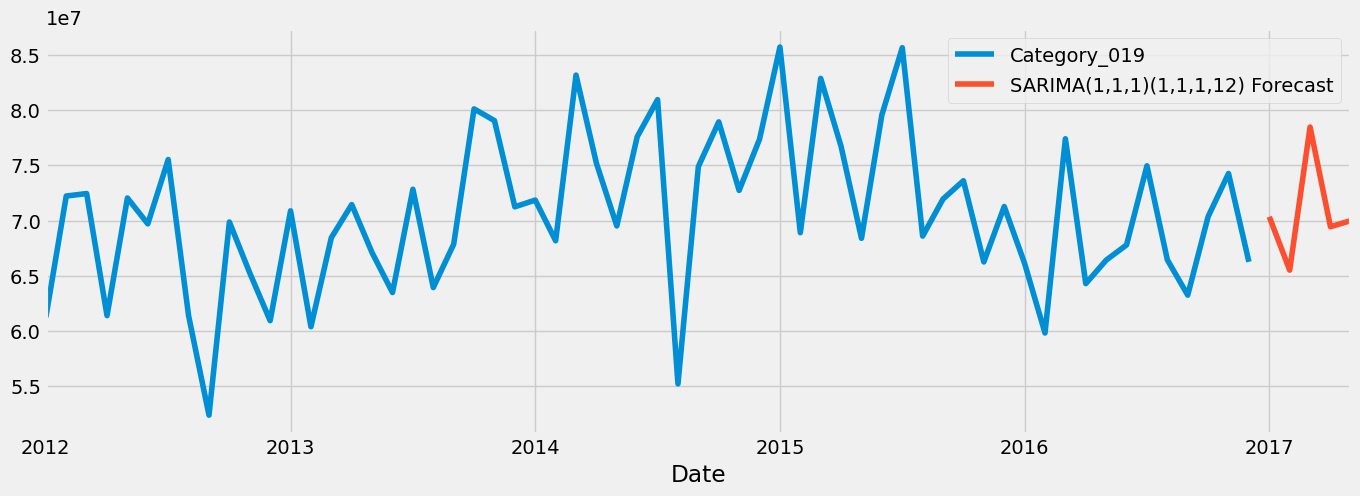

In [145]:
ax = df_019["Category_019"].plot(legend=True,figsize=(15,5))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [146]:
fcast.astype(str)

2017-01-31    70336423.28176612
2017-02-28    65502088.14037372
2017-03-31    78470071.35371351
2017-04-30    69437483.19168107
2017-05-31    69992741.93514653
Freq: M, Name: SARIMA(1,1,1)(1,1,1,12) Forecast, dtype: object

### Category 006

In [147]:
df_006 = pd.DataFrame(y.Category_006.iloc[12:-1])
df_006.head()

,Category_006
Date,
2012-01-31,6321967.0
2012-02-29,6558261.0
2012-03-31,6211294.0
2012-04-30,5847702.0
2012-05-31,6428599.0


<Axes: xlabel='Date'>

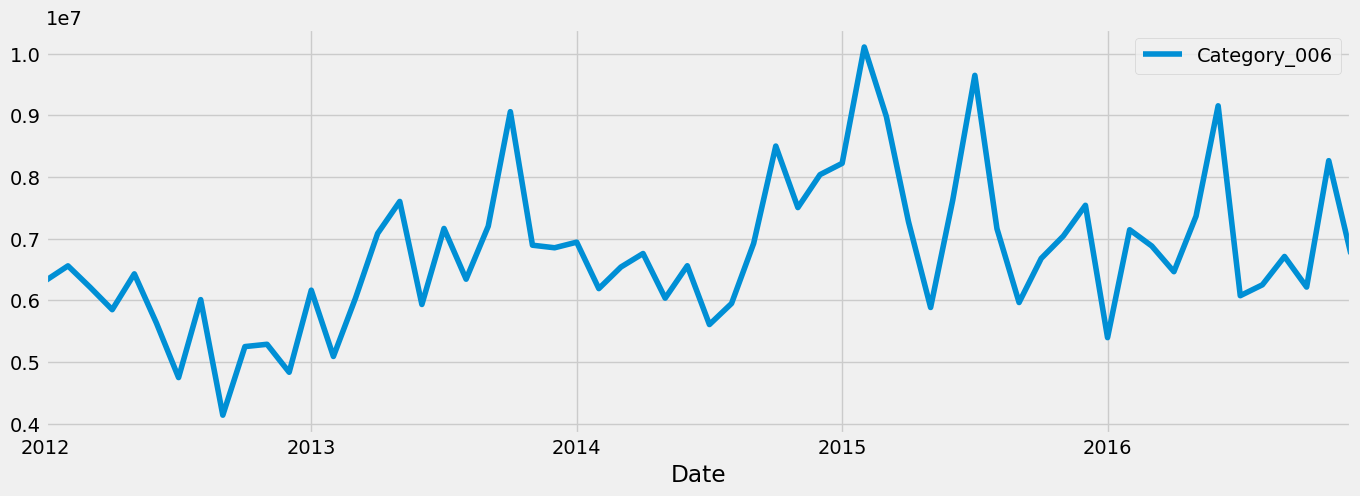

In [148]:
df_006.plot(figsize=(15,5))

In [152]:
fcast_model = SARIMAX(df_006.Category_006,order=(1,1,1),seasonal_order=(1,1,1,12))
results = fcast_model.fit()
fcast = results.predict(len(df_006["Category_006"]),
                        len(df_006["Category_006"])+4,typ='levels').rename('SARIMA(1,1,1)(1,1,1,12) Forecast')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23039D+01    |proj g|=  9.18858D-02

At iterate    5    f=  1.22431D+01    |proj g|=  3.01055D-02

At iterate   10    f=  1.22336D+01    |proj g|=  6.66387D-03

At iterate   15    f=  1.22332D+01    |proj g|=  7.10482D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     18      1     0     0   2.867D-06   1.223D+01
  F =   12.233230707710353     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/sachinkumar/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


In [153]:
fcast.astype(str)

2017-01-31     6638961.487876166
2017-02-28     7704098.867369823
2017-03-31    7526083.5920932805
2017-04-30     7144957.551563274
2017-05-31     7322632.910847316
Freq: M, Name: SARIMA(1,1,1)(1,1,1,12) Forecast, dtype: object

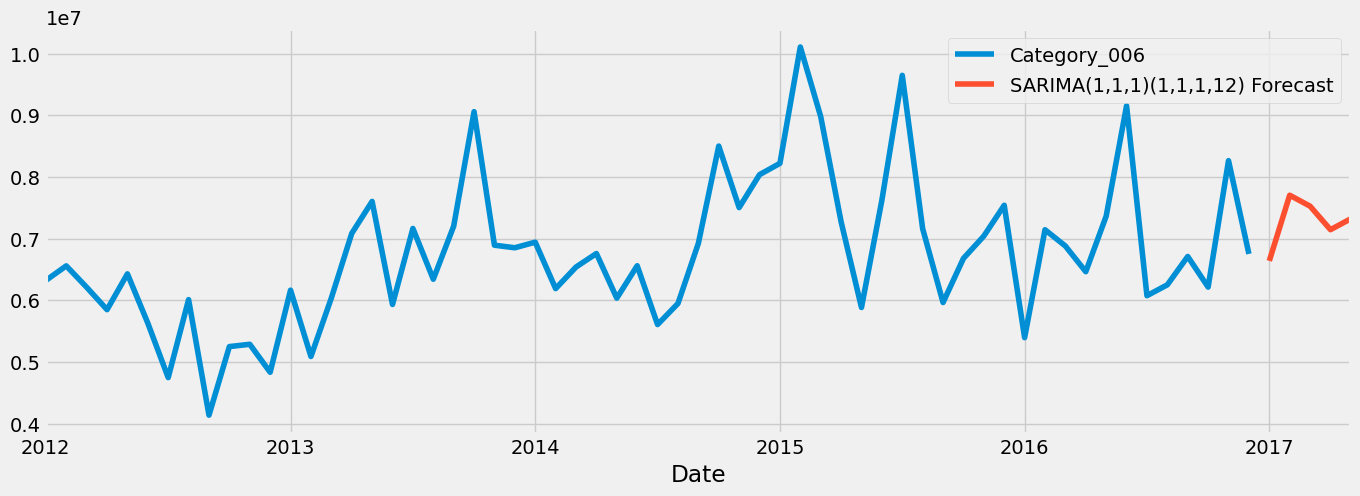

In [154]:
ax = df_006["Category_006"].plot(legend=True,figsize=(15,5))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)

### Category 005

In [155]:
df_005 = pd.DataFrame(y.Category_005.iloc[12:-1])
df_005.head()

,Category_005
Date,
2012-01-31,2920345.0
2012-02-29,3213850.0
2012-03-31,3251070.0
2012-04-30,2626790.0
2012-05-31,3480100.0


<Axes: xlabel='Date'>

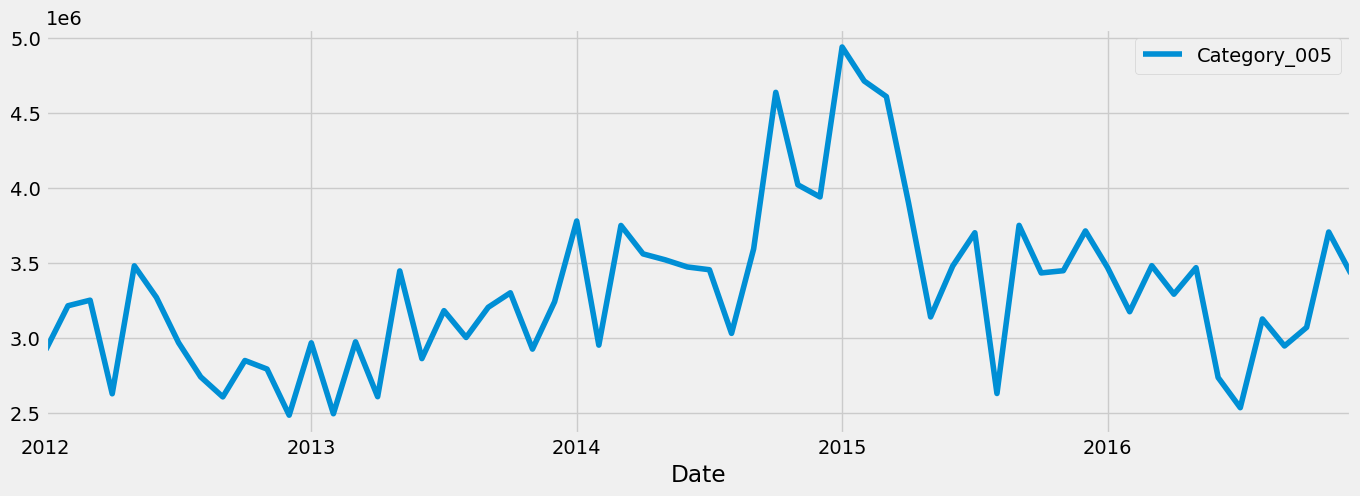

In [156]:
df_005.plot(figsize=(15,5))

In [157]:
fcast_model = SARIMAX(df_005.Category_005,order=(1,1,1),seasonal_order=(1,1,1,12))
results = fcast_model.fit()
fcast = results.predict(len(df_005["Category_005"]),
                        len(df_005["Category_005"])+4,typ='levels').rename('SARIMA(1,1,1)(1,1,1,12) Forecast')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15922D+01    |proj g|=  1.45535D-01

At iterate    5    f=  1.14405D+01    |proj g|=  1.12743D-02

At iterate   10    f=  1.14397D+01    |proj g|=  3.95399D-04

At iterate   15    f=  1.14397D+01    |proj g|=  8.26468D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     21      1     0     0   8.265D-06   1.144D+01
  F =   11.439735251575975     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/sachinkumar/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


In [158]:
fcast_.astype(str)

2017-01-31     6638961.487876166
2017-02-28     7704098.867369823
2017-03-31    7526083.5920932805
2017-04-30     7144957.551563274
2017-05-31     7322632.910847316
Freq: M, Name: SARIMA(1,1,1)(1,1,1,12) Forecast, dtype: object

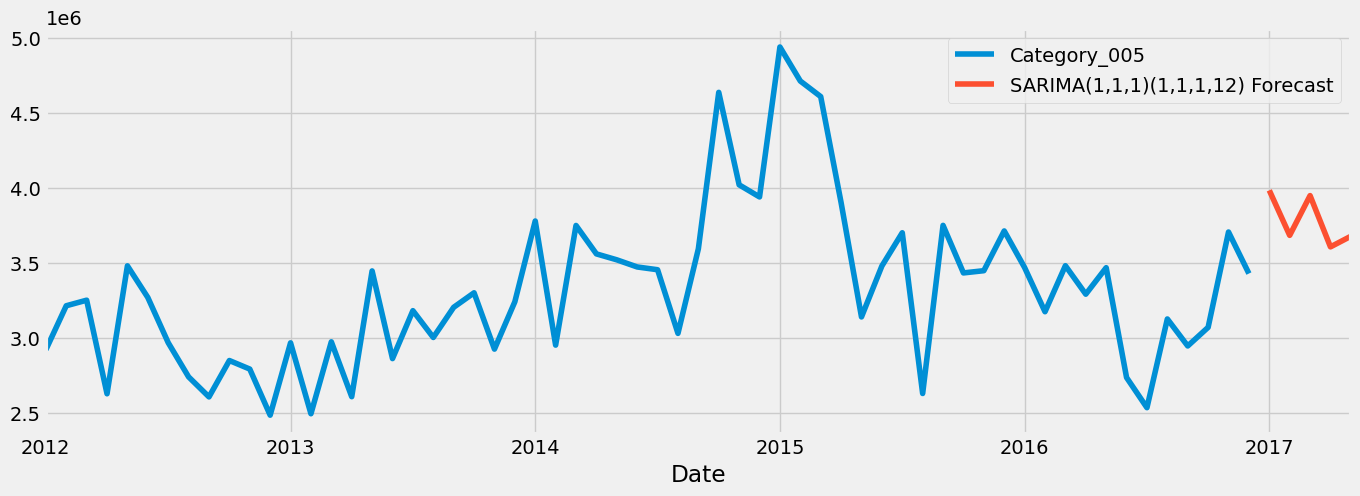

In [159]:
ax = df_005["Category_005"].plot(legend=True,figsize=(15,5))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)

### Category 007

In [160]:
df_007 = pd.DataFrame(y["Category_007"].iloc[12:-1]) # Including data from 2012 to 2016 end except last value
df_007.head()

,Category_007
Date,
2012-01-31,2061395.0
2012-02-29,2425188.0
2012-03-31,2493959.0
2012-04-30,2788682.0
2012-05-31,1709295.0


<Axes: xlabel='Date'>

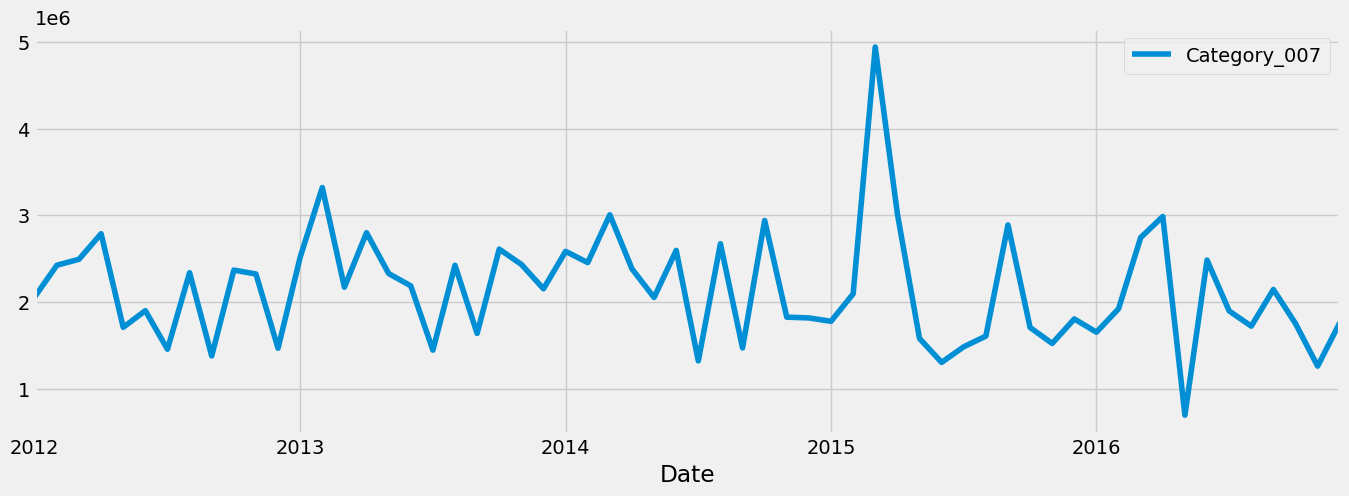

In [161]:
df_007.plot(figsize=(15,5))

In [162]:
fcast_model = SARIMAX(df_007.Category_007,order=(1,1,1),seasonal_order=(1,1,1,12))
results = fcast_model.fit()
fcast = results.predict(len(df_007["Category_007"]),
                        len(df_007["Category_007"])+4,typ='levels').rename('SARIMA(1,1,1)(1,1,1,12) Forecast')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17510D+01    |proj g|=  8.87866D-02

At iterate    5    f=  1.17149D+01    |proj g|=  1.51438D-02

At iterate   10    f=  1.17117D+01    |proj g|=  5.16103D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     13      1     0     0   1.463D-05   1.171D+01
  F =   11.711691959051192     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/sachinkumar/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


In [163]:
fcast.astype(str)

2017-01-31    1777395.4973144364
2017-02-28    2065639.7251289925
2017-03-31     2997224.864499248
2017-04-30    2744193.3091604775
2017-05-31    1179857.4384757197
Freq: M, Name: SARIMA(1,1,1)(1,1,1,12) Forecast, dtype: object

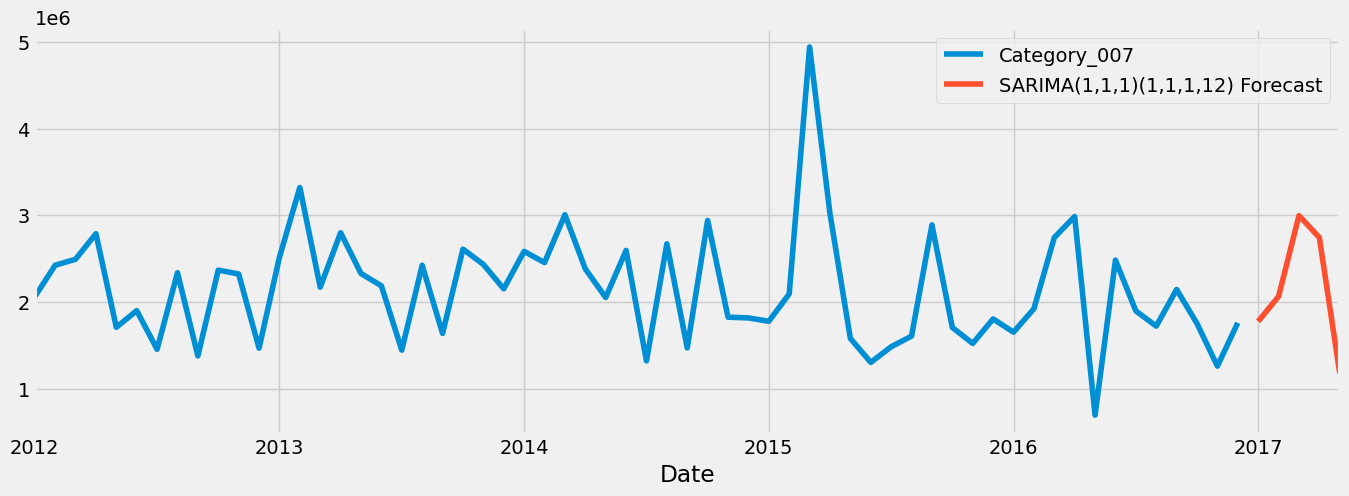

In [164]:
ax = df_007["Category_007"].plot(legend=True,figsize=(15,5))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)

### Category 028

In [165]:
df_028 = pd.DataFrame(y["Category_028"].iloc[12:-1]) # Including data from 2012 to 2016 end except last value
df_028.head()

,Category_028
Date,
2012-01-31,508190.0
2012-02-29,463039.0
2012-03-31,560369.0
2012-04-30,374385.0
2012-05-31,780988.0


<Axes: xlabel='Date'>

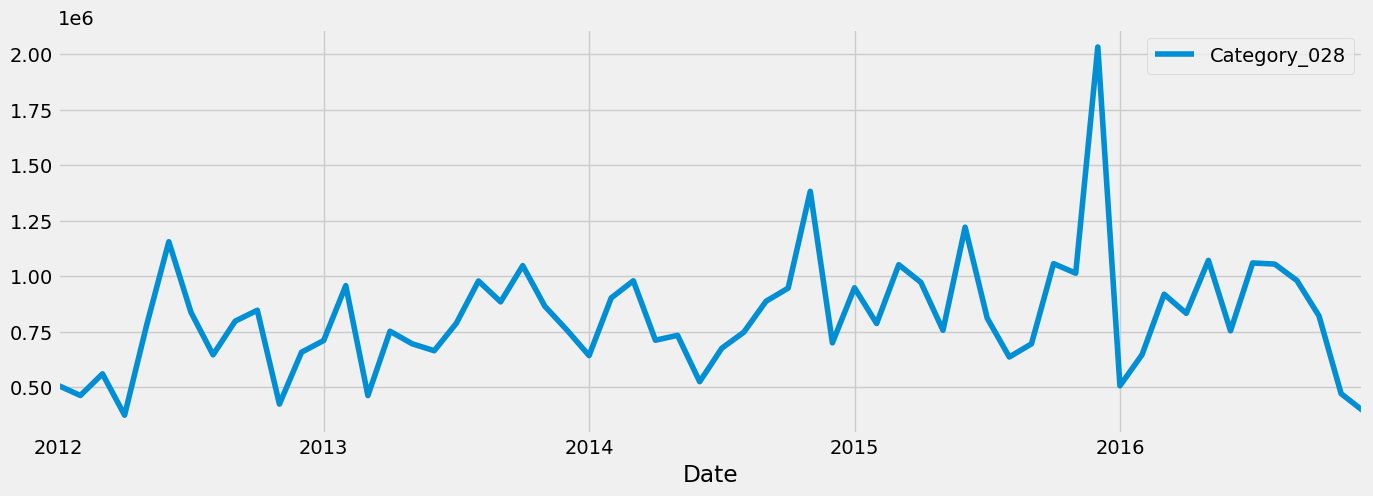

In [166]:
df_028.plot(figsize=(15,5))

In [167]:
fcast_model = SARIMAX(df_028.Category_028,order=(1,1,1),seasonal_order=(1,1,1,12))
results = fcast_model.fit()
fcast = results.predict(len(df_028["Category_028"]),
                        len(df_028["Category_028"])+4,typ='levels').rename('SARIMA(1,1,1)(1,1,1,12) Forecast')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12238D+01    |proj g|=  7.09830D-02

At iterate    5    f=  1.11710D+01    |proj g|=  1.51938D-02

At iterate   10    f=  1.11679D+01    |proj g|=  7.02563D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     14      1     0     0   5.486D-06   1.117D+01
  F =   11.167882036383192     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/sachinkumar/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


In [168]:
fcast.astype(str)

2017-01-31    612896.8272434361
2017-02-28    693608.7504410939
2017-03-31    809493.5843000911
2017-04-30    729174.9701189405
2017-05-31    691726.6887048098
Freq: M, Name: SARIMA(1,1,1)(1,1,1,12) Forecast, dtype: object

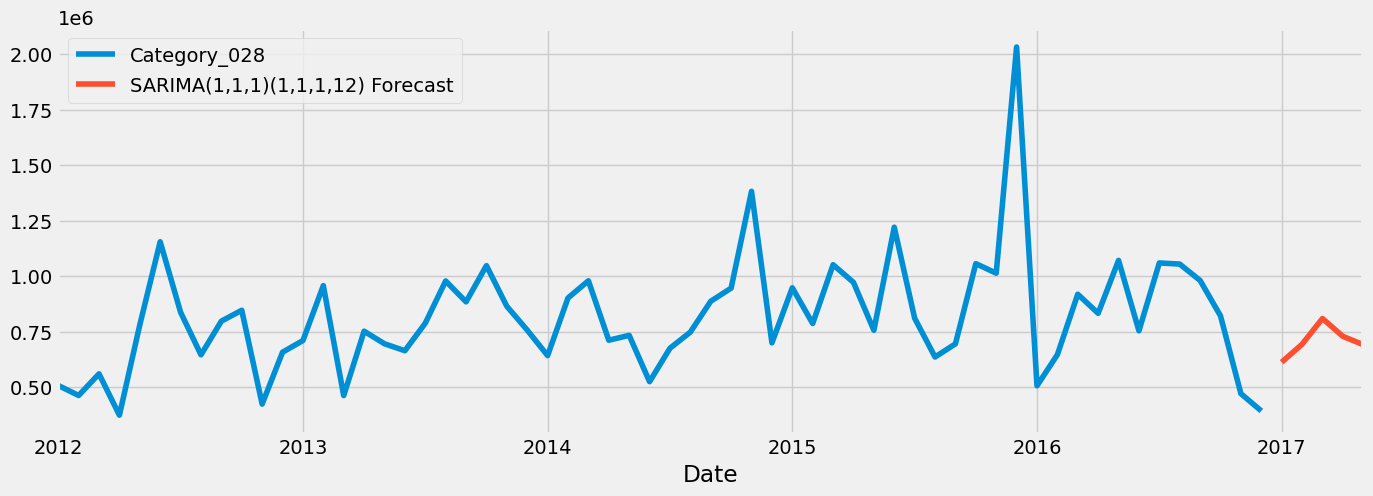

In [169]:
ax = df_028["Category_028"].plot(legend=True,figsize=(15,5))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)

### Category 033

In [170]:
df_033 = pd.DataFrame(y["Category_033"].iloc[12:-1]) # Including data from 2012 to 2016 end except last value
df_033.head()

,Category_033
Date,
2012-01-31,600000.0
2012-02-29,900000.0
2012-03-31,530000.0
2012-04-30,830000.0
2012-05-31,980000.0


<Axes: xlabel='Date'>

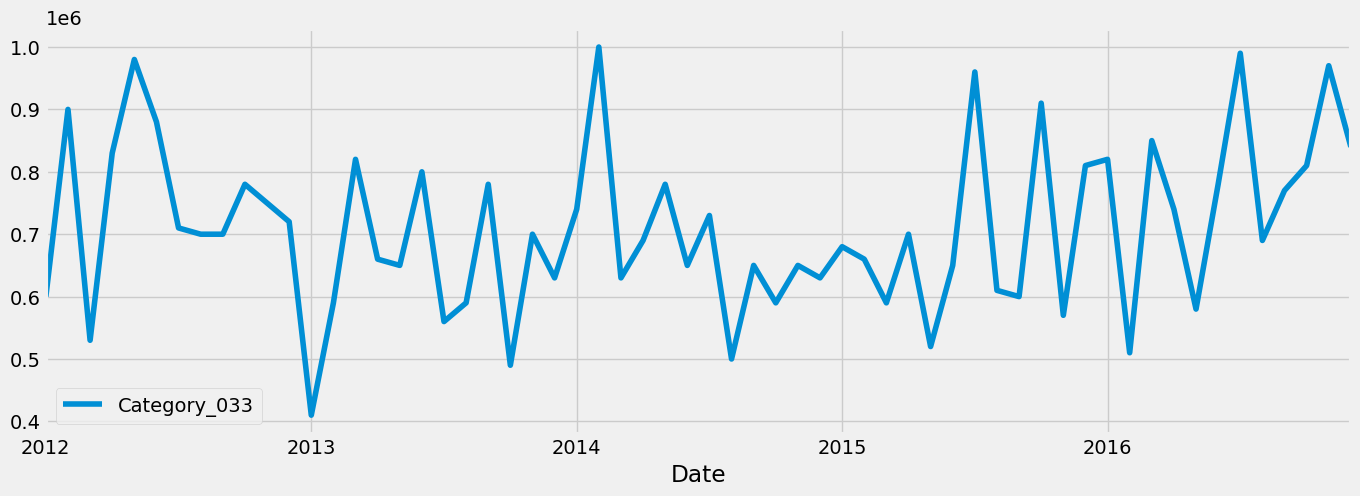

In [171]:
df_033.plot(figsize=(15,5))

In [172]:
fcast_model = SARIMAX(df_033.Category_033,order=(1,1,1),seasonal_order=(1,1,1,12))
results = fcast_model.fit()
fcast = results.predict(len(df_033["Category_033"]),
                        len(df_033["Category_033"])+4,typ='levels').rename('SARIMA(1,1,1)(1,1,1,12) Forecast')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06587D+01    |proj g|=  4.16827D-01

At iterate    5    f=  1.05636D+01    |proj g|=  1.75282D-02

At iterate   10    f=  1.05631D+01    |proj g|=  7.44206D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     13      1     0     0   6.747D-06   1.056D+01
  F =   10.563080119559936     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/sachinkumar/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


In [173]:
fcast.astype(str)

2017-01-31    935142.4952669913
2017-02-28    867440.9526956553
2017-03-31    909729.5214302123
2017-04-30    920014.0290685847
2017-05-31     812203.353153562
Freq: M, Name: SARIMA(1,1,1)(1,1,1,12) Forecast, dtype: object

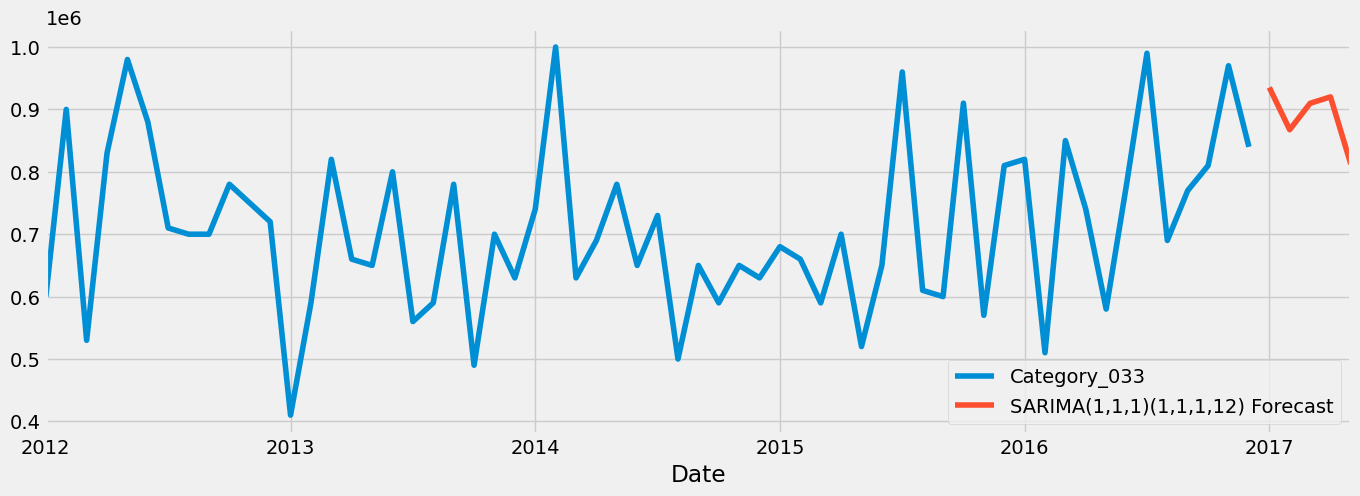

In [174]:
ax = df_033["Category_033"].plot(legend=True,figsize=(15,5))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)

### Category 030

In [175]:
df_030 = pd.DataFrame(y["Category_030"].iloc[12:-1]) # Including data from 2012 to 2016 end except last value
df_030.head()

,Category_030
Date,
2012-01-31,407350.0
2012-02-29,657850.0
2012-03-31,553450.0
2012-04-30,457450.0
2012-05-31,436151.0


<Axes: xlabel='Date'>

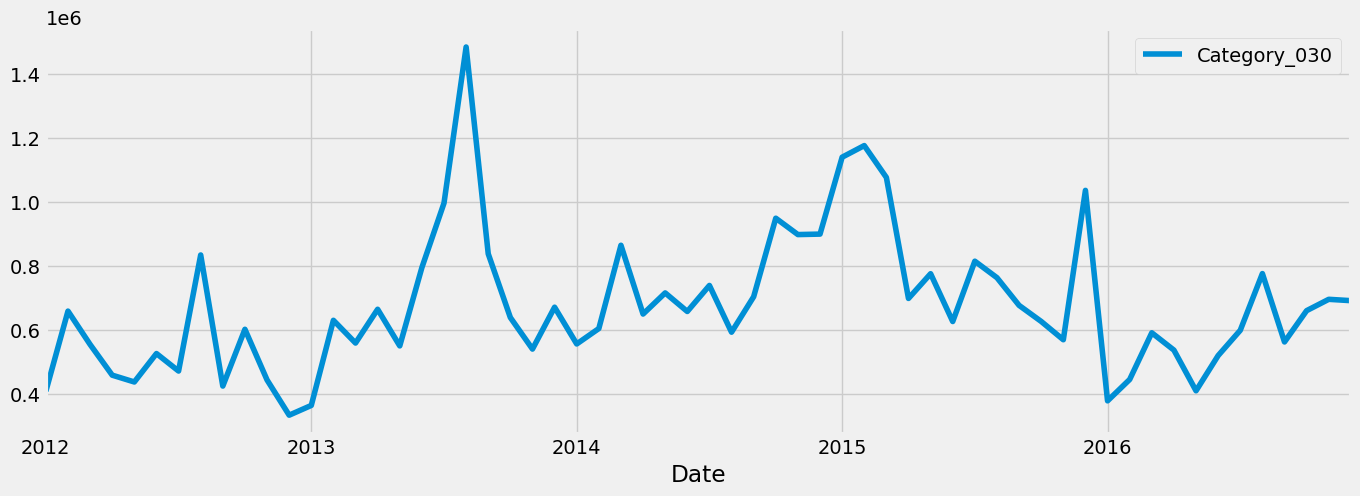

In [176]:
df_030.plot(figsize=(15,5))

In [177]:
fcast_model = SARIMAX(df_030.Category_030,order=(1,1,1),seasonal_order=(1,1,1,12))
results = fcast_model.fit()
fcast = results.predict(len(df_030["Category_030"]),
                        len(df_030["Category_030"])+4,typ='levels').rename('SARIMA(1,1,1)(1,1,1,12) Forecast')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12465D+01    |proj g|=  8.78365D-01

At iterate    5    f=  1.08002D+01    |proj g|=  1.68504D-02

At iterate   10    f=  1.07990D+01    |proj g|=  2.98344D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     15      1     0     0   7.814D-06   1.080D+01
  F =   10.798890386008109     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/sachinkumar/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/sachinkumar/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


In [178]:
fcast.astype(str)

2017-01-31    639511.6907468722
2017-02-28    731625.0293599669
2017-03-31    767791.8708894028
2017-04-30    597996.6478773549
2017-05-31    591255.2154682705
Freq: M, Name: SARIMA(1,1,1)(1,1,1,12) Forecast, dtype: object

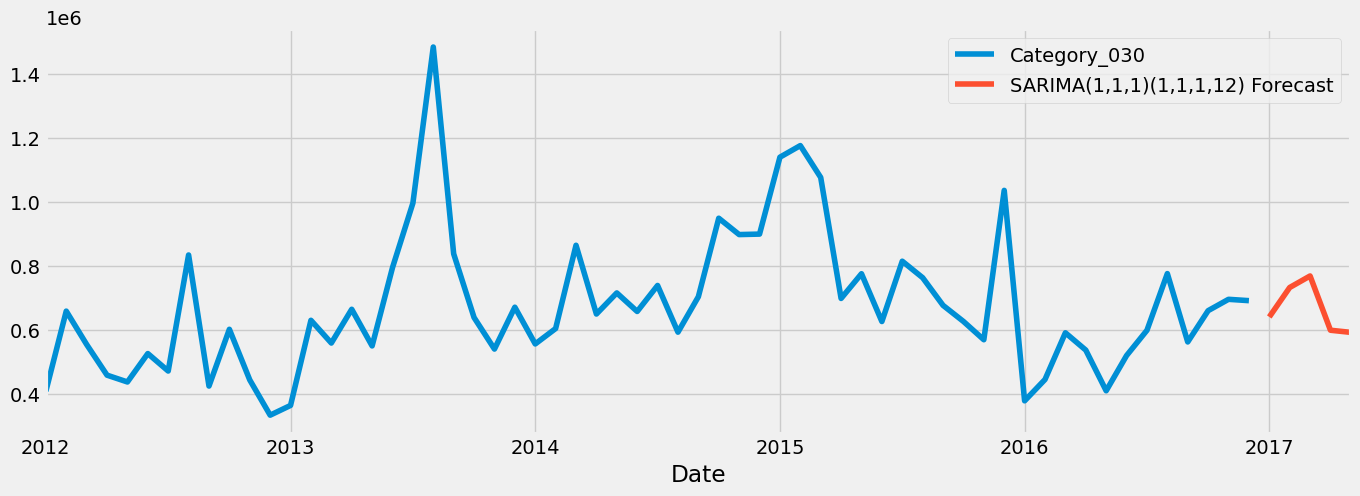

In [179]:
ax = df_030["Category_030"].plot(legend=True,figsize=(15,5))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)